<a href="https://colab.research.google.com/github/blacknand/CE101-team-project/blob/main/CE101_team_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sources:


*   https://www.datacamp.com/tutorial/understanding-logistic-regression-python
*   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


*   https://github.com/melaniewalsh/heart-disease-prediction/blob/master/Modeling.ipynb


*   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html








# Detecting heart disease with machine learning
**What is heart disease?**


*   It is a medical condition that affects the hearts ability to function properly. Early detection of it can save lives by enabling interventions before anything serious occurs.

**How can we use machine learning to help detect it?**


*   We can use algorithims to learn patterns from data, since we have a large dataset of patiens with varying paramaters we can use this to predict heart disease in new patiens




In [ ]:
# Plotting libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py

import missingno as msno
from scipy import stats
from google.colab import drive

# SciKit learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance

import os
import warnings
import shap

warnings.filterwarnings('ignore')

# Mount drive because colab cannot find heart.csv file
# additionally you may need to give full access to your drive
# drive.mount('/content/drive')
sns.set(style='darkgrid')

print(os.getcwd())
df = pd.read_csv('/content/sample_data/heart.csv')
df.head()

/content


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Displaying the dataframe

In [ ]:
df.columns = ['Age', 'Sex', 'Chest_pain_type', 'Resting_bp', 'Cholesterol', 'Fasting_bs', 'Resting_ecg',
            'Max_heart_rate', 'Exercise_induced_angina', 'ST_depression', 'ST_slope', 'Num_major_vessels',
            'Thallium_test', 'Condition']

df.head()
df.describe()
df.info()

# Data types, missing values
print()
print(f'Shape of the dataset')
print(f'Number of Features: {df.shape[1]}')
print(f'Number of Observations: {df.shape[0]}')

df.isnull().sum()               # Check missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      303 non-null    int64  
 1   Sex                      303 non-null    int64  
 2   Chest_pain_type          303 non-null    int64  
 3   Resting_bp               303 non-null    int64  
 4   Cholesterol              303 non-null    int64  
 5   Fasting_bs               303 non-null    int64  
 6   Resting_ecg              303 non-null    int64  
 7   Max_heart_rate           303 non-null    int64  
 8   Exercise_induced_angina  303 non-null    int64  
 9   ST_depression            303 non-null    float64
 10  ST_slope                 303 non-null    int64  
 11  Num_major_vessels        303 non-null    int64  
 12  Thallium_test            303 non-null    int64  
 13  Condition                303 non-null    int64  
dtypes: float64(1), int64(13)
m

,0
Age,0
Sex,0
Chest_pain_type,0
Resting_bp,0
Cholesterol,0
Fasting_bs,0
Resting_ecg,0
Max_heart_rate,0
Exercise_induced_angina,0
ST_depression,0


Create a pie chart showing the number of people with malignant heart disease compared to benign heart disease

In [ ]:
def condition_ratio(data):
    """
    Make a pie chart of 'Condition' values
    Condition: 0 = Benign, 1 = Malignant
    """
    results = data['Condition'].value_counts()
    values = [results[0], results[1]]
    labels = ['Benign', 'Malignant']
    colors = ['MediumSeaGreen', 'Coral']

    fig_pie = go.Pie(labels=labels, values=values,
                     marker={'colors': colors,
                             'line': {'color': 'Black', 'width': 2}})
    py.iplot([fig_pie])
    return py


condition_ratio(df);

Make a pie chart of male to female patients in the dataset

In [ ]:
def sex_ratio(data):
    """
    Make a pie chart of 'Sex' values
    Sex: 0 = Female, 1 = Male
    """
    # Pie chart of sex ratio
    results = data['Sex'].value_counts()
    values = [results[0], results[1]]
    labels = ['Female', 'Male']
    colors = ['Red', 'RoyalBlue']

    fig_pie = go.Pie(labels=labels, values=values,
                     marker={'colors': colors,
                             'line': {'color': 'Black', 'width': 2}})
    py.iplot([fig_pie])
    return py


sex_ratio(df);

Plot a bar chart of the portion of male malignant patients with female malignant patients

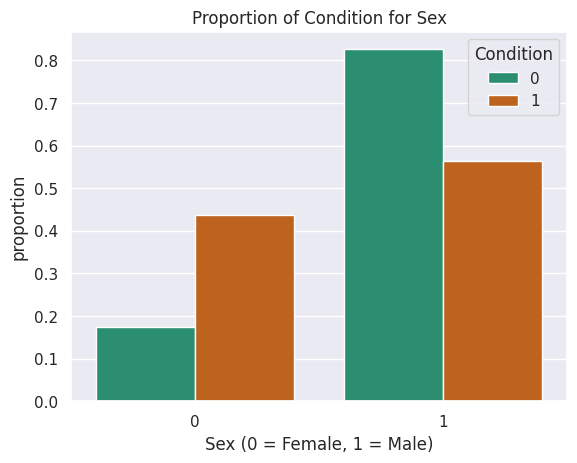

The proportion of Malignant for Sex:
Female: 43.64%
Male: 56.36%


In [ ]:
def condition_proportion_sex(data):
    """
    Plot a bar chart of the proportion of Conditon vs. Sex.
    Show the percentage of Malignant for each sex.
    """
    # Bivariate analysis: Sex vs. Condition as a bar graph
    data['Sex'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Sex', y='proportion', hue='Condition', palette='Dark2');
    plt.title('Proportion of Condition for Sex')
    plt.xlabel('Sex (0 = Female, 1 = Male)')
    plt.show()


    # Show the percentage of Malignant for Sex
    # female_malignant vs. Malignant
    female_malignant = data[data['Sex']==0]['Condition'].sum()/data[data['Condition']==1]['Condition'].count()
    # male_malignant vs. Malignant
    male_malignant = data[data['Sex']==1]['Condition'].sum()/data[data['Condition']==1]['Condition'].count()

    print('The proportion of Malignant for Sex:')
    print(f'Female: {female_malignant:.2%}')
    print(f'Male: {male_malignant:.2%}')


condition_proportion_sex(df);

Graph of 3 seperate bar charts showing:


1.   The fasting blood sugar counts over 120 mg/dl
2.   The portion of fasting blood sugar over 120 mg/dl for both male and female
3.   The portion of fasting blood sugar over 120 mg/dl for malignant and benign conditions



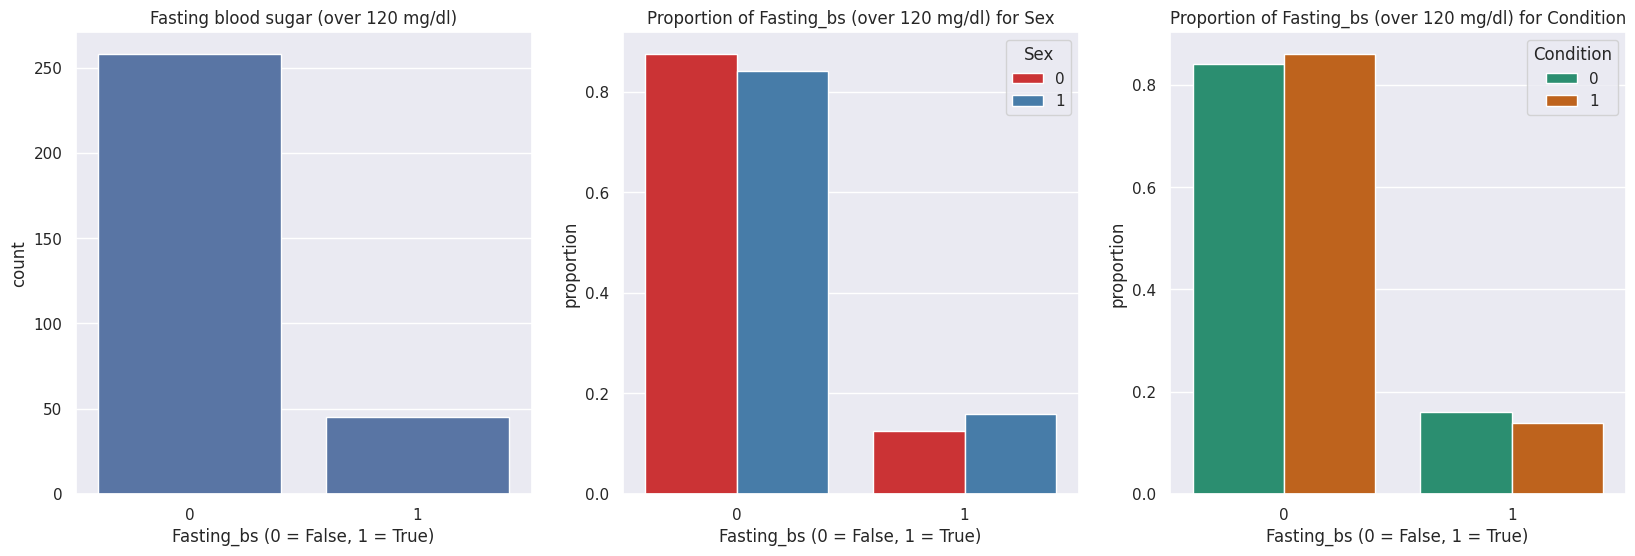

In [ ]:
def risk_factors_fbs(data):
    """
    Plot bar charts of fasting blood sugar (over 120 mg/dl) and compare for Sex and Condition
    """
    fig = plt.figure(figsize=(20, 6))

    # Fasting blood sugar > 120 mg/dl
    plt.subplot(1, 3, 1)
    sns.countplot(x='Fasting_bs', data=data)
    plt.title('Fasting blood sugar (over 120 mg/dl)')
    plt.xlabel('Fasting_bs (0 = False, 1 = True)')


    # Fasting blood sugar for Sex
    plt.subplot(1, 3, 2)
    df['Fasting_bs'].groupby(df['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Fasting_bs', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Fasting_bs (over 120 mg/dl) for Sex')
    plt.xlabel('Fasting_bs (0 = False, 1 = True)')


    # Fasting blood sugar for Condition
    plt.subplot(1, 3, 3)
    df['Fasting_bs'].groupby(df['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Fasting_bs', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of Fasting_bs (over 120 mg/dl) for Condition')
    plt.xlabel('Fasting_bs (0 = False, 1 = True)')
    plt.show()


risk_factors_fbs(df);

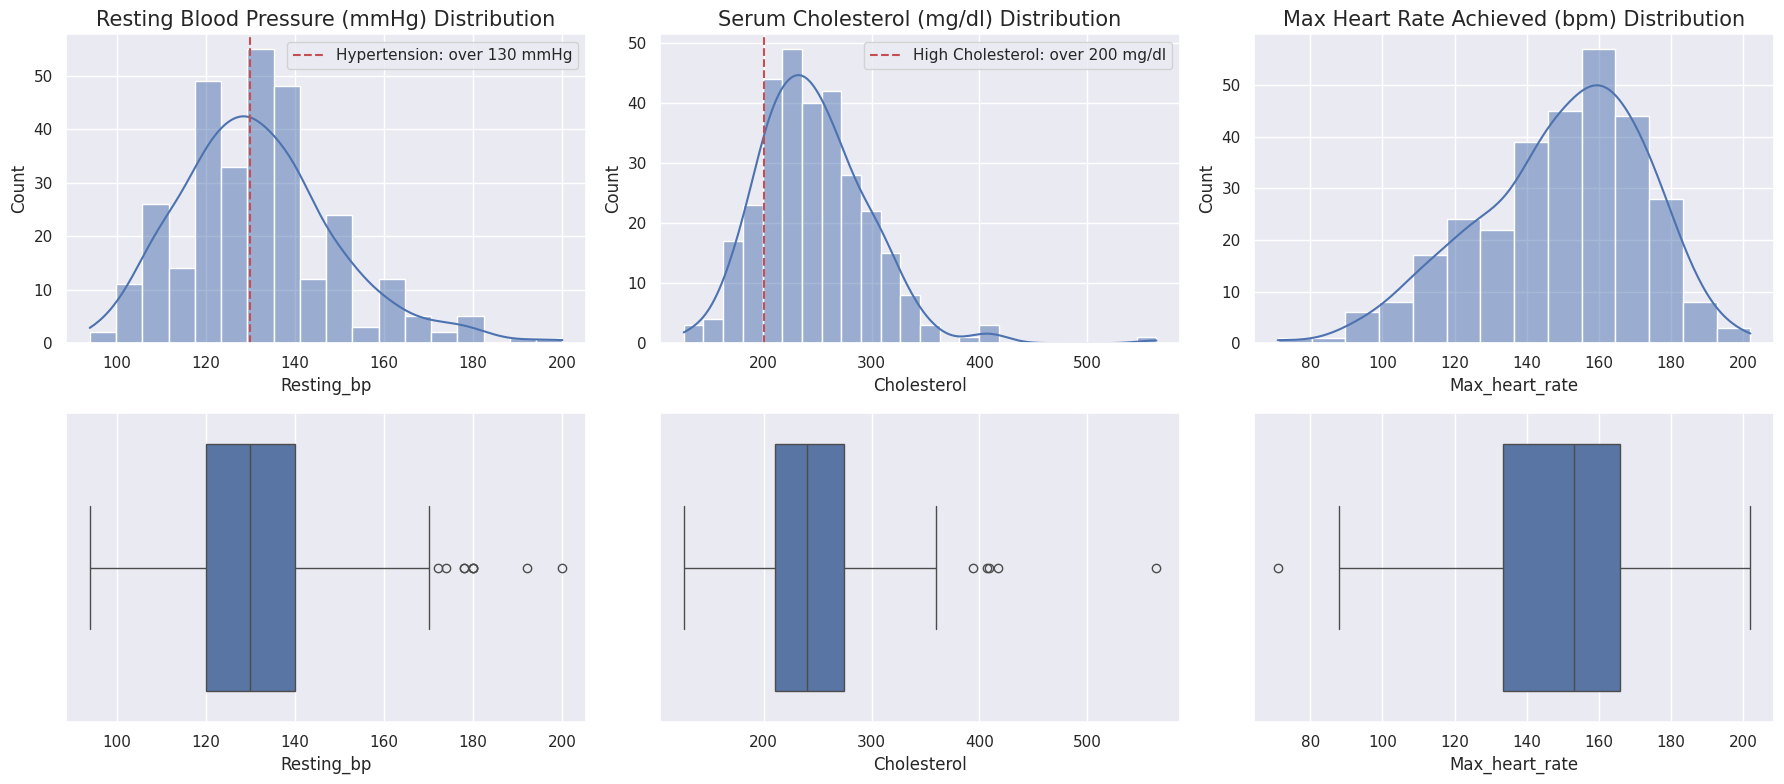

In [ ]:
def risk_factors_dist(data):
    """
    Show distributions of risk factors, Resting_bp, Cholesterol, and Max_heart_rate
    """
    fig = plt.figure(figsize=(18, 8))

    # Resting blood pressure
    plt.subplot(2, 3, 1)
    sns.histplot(data['Resting_bp'], kde=True)
    plt.title('Resting Blood Pressure (mmHg) Distribution', fontsize=15)
    plt.axvline(x=130, color='r', linestyle='--', label='Hypertension: over 130 mmHg')
    plt.legend()

    plt.subplot(2, 3, 4)
    sns.boxplot(data['Resting_bp'], orient='h')

    # Serum cholesterol
    plt.subplot(2, 3, 2)
    sns.histplot(data['Cholesterol'], kde=True)
    plt.title('Serum Cholesterol (mg/dl) Distribution', fontsize=15)
    plt.axvline(x=200, color='r', linestyle='--', label='High Cholesterol: over 200 mg/dl')
    plt.legend()

    plt.subplot(2, 3, 5)
    sns.boxplot(data['Cholesterol'], orient='h')

    # Maximum heart rate
    plt.subplot(2, 3, 3)
    sns.histplot(data['Max_heart_rate'], kde=True)
    plt.title('Max Heart Rate Achieved (bpm) Distribution', fontsize=15)

    plt.subplot(2, 3, 6)
    sns.boxplot(data['Max_heart_rate'], orient='h')

    plt.tight_layout()
    plt.show()

risk_factors_dist(df)

<ipython-input-23-2b048086f7e0>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-23-2b048086f7e0>:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-23-2b048086f7e0>:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




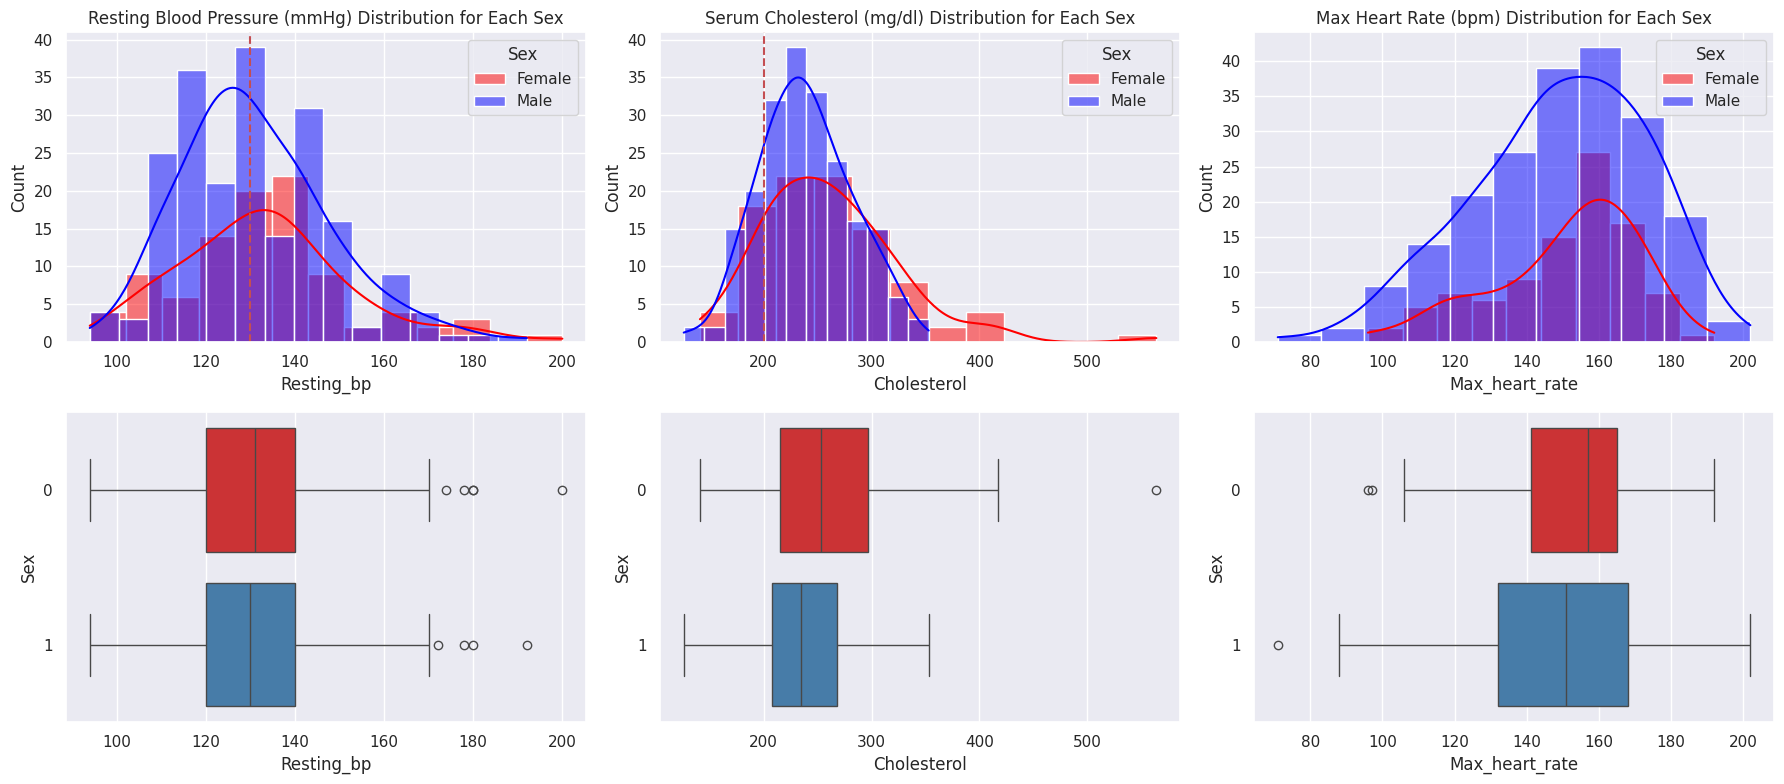

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def risk_factors_dist_sex(data):
    """
    Show distributions of risk factors for each sex
    """
    fig = plt.figure(figsize=(18, 8))

    # Resting blood pressure for each sex
    plt.subplot(2, 3, 1)
    trestbps_female = data[data['Sex'] == 0]['Resting_bp']
    trestbps_male = data[data['Sex'] == 1]['Resting_bp']
    sns.histplot(trestbps_female, color='Red', kde=True, label='Female')
    sns.histplot(trestbps_male, color='Blue', kde=True, label='Male')
    plt.title('Resting Blood Pressure (mmHg) Distribution for Each Sex')
    plt.gca().legend(title='Sex')
    plt.axvline(x=130, color='r', linestyle='--', label='Hypertension: over 130 mmHg')

    plt.subplot(2, 3, 4)
    sns.boxplot(x=data['Resting_bp'], y=data['Sex'], palette='Set1', orient='h')

    # Serum cholesterol distribution for each sex
    plt.subplot(2, 3, 2)
    chol_female = data[data['Sex'] == 0]['Cholesterol']
    chol_male = data[data['Sex'] == 1]['Cholesterol']
    sns.histplot(chol_female, color='Red', kde=True, label='Female')
    sns.histplot(chol_male, color='Blue', kde=True, label='Male')
    plt.title('Serum Cholesterol (mg/dl) Distribution for Each Sex')
    plt.gca().legend(title='Sex')
    plt.axvline(x=200, color='r', linestyle='--', label='High Cholesterol: over 200 mg/dl')

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['Cholesterol'], y=data['Sex'], palette='Set1', orient='h')

    # Max heart rate distribution for each sex
    plt.subplot(2, 3, 3)
    thalach_female = data[data['Sex'] == 0]['Max_heart_rate']
    thalach_male = data[data['Sex'] == 1]['Max_heart_rate']
    sns.histplot(thalach_female, color='Red', kde=True, label='Female')
    sns.histplot(thalach_male, color='Blue', kde=True, label='Male')
    plt.title('Max Heart Rate (bpm) Distribution for Each Sex')
    plt.gca().legend(title='Sex')

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Max_heart_rate'], y=data['Sex'], palette='Set1', orient='h')

    plt.tight_layout()
    plt.show()

risk_factors_dist_sex(df)

<ipython-input-16-566663e64b42>:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-16-566663e64b42>:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-16-566663e64b42>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` v

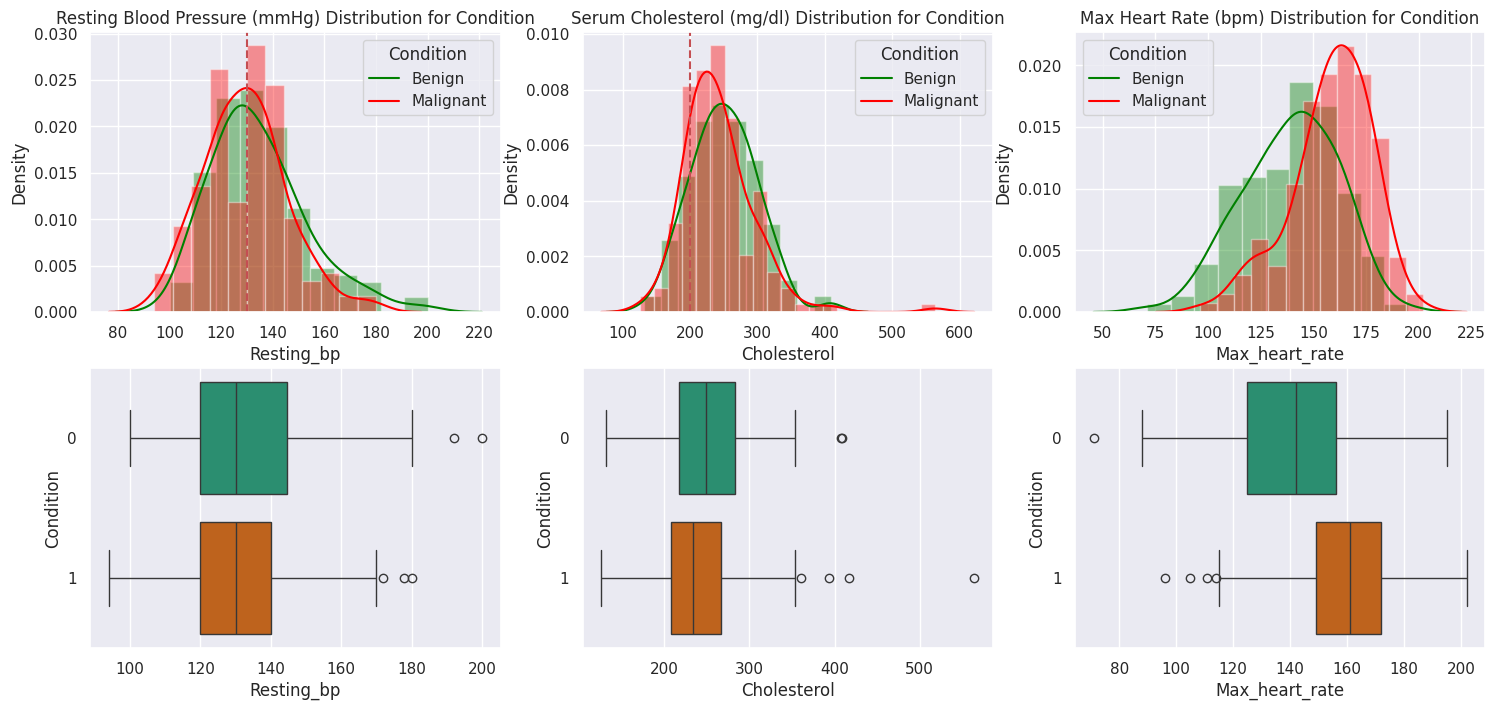

In [ ]:
def risk_factors_dist_condition(data):
    """
    Show distributions of risk factors for each condition
    """
    fig = plt.figure(figsize=(18, 8))

    # Resting blood pressure distribution for each condition
    plt.subplot(2, 3, 1)
    trestbps_b = data[data['Condition']==0]['Resting_bp']
    trestbps_m = data[data['Condition']==1]['Resting_bp']
    sns.distplot(trestbps_b, color='Green')
    sns.distplot(trestbps_m, color='Red')
    plt.title('Resting Blood Pressure (mmHg) Distribution for Condition')
    plt.gca().legend(title='Condition', labels=['Benign','Malignant'])
    plt.axvline(x=130, color='r', linestyle='--', label='Hypertension: over 130 mmHg')

    plt.subplot(2, 3, 4)
    sns.boxplot(x=data['Resting_bp'], y=data['Condition'],
                orient='h', palette='Dark2')


    # Serum cholesterol distribution for each condition
    plt.subplot(2, 3, 2)
    chol_b = data[data['Condition']==0]['Cholesterol']
    chol_m = data[data['Condition']==1]['Cholesterol']
    sns.distplot(chol_b, color='Green')
    sns.distplot(chol_m, color='Red')
    plt.title('Serum Cholesterol (mg/dl) Distribution for Condition')
    plt.gca().legend(title='Condition', labels=['Benign','Malignant'])
    plt.axvline(x=200, color='r', linestyle='--', label='High Cholesterol: over 200 mg/dl')

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['Cholesterol'], y=data['Condition'],
                orient='h', palette='Dark2')


    # Max heart rate achieved distribution for each condition
    plt.subplot(2, 3, 3)
    thalach_b = data[data['Condition']==0]['Max_heart_rate']
    thalach_m = data[data['Condition']==1]['Max_heart_rate']
    sns.distplot(thalach_b, color='Green')
    sns.distplot(thalach_m, color='Red')
    plt.title('Max Heart Rate (bpm) Distribution for Condition')
    plt.gca().legend(title='Condition', labels=['Benign','Malignant'])

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Max_heart_rate'], y=data['Condition'],
                orient='h', palette='Dark2')


risk_factors_dist_condition(df);

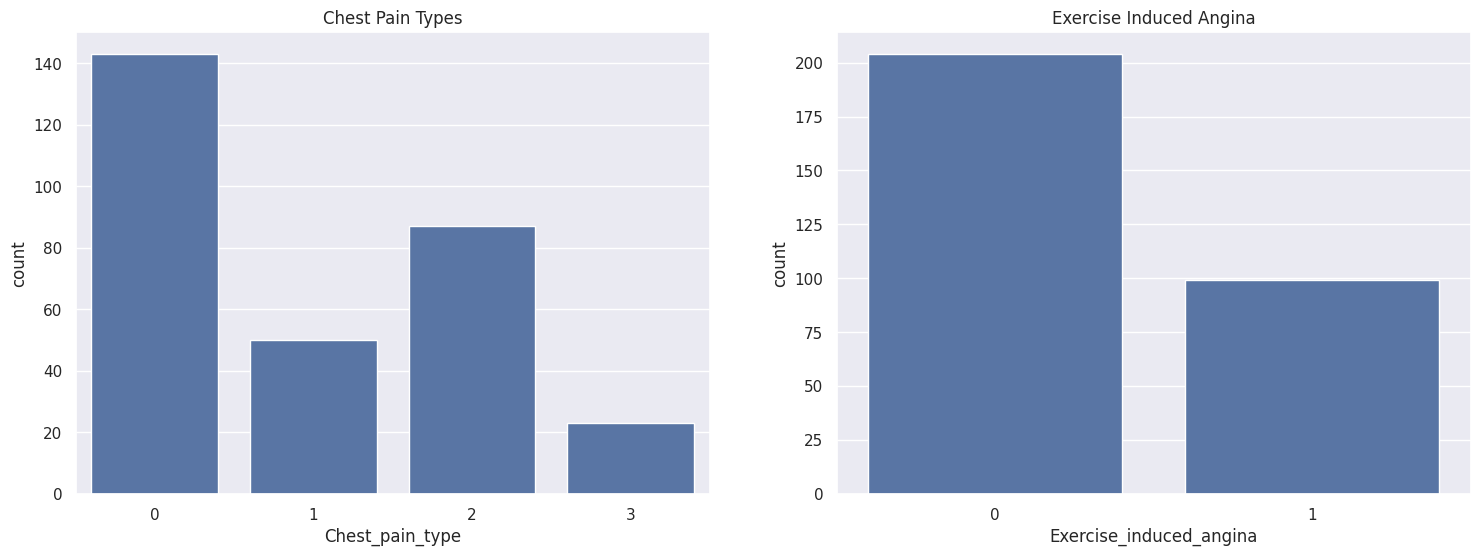

In [ ]:
def symptoms_features(data):
    """
    Count the number of Chest_pain_type and Exercise_induced_angina values.
    """
    plt.figure(figsize=(18, 6))

    # Chest pain types
    plt.subplot(1, 2, 1)
    sns.countplot(x='Chest_pain_type', data=data)
    plt.title('Chest Pain Types')


    # Exercise induced angina
    plt.subplot(1, 2, 2)
    sns.countplot(x='Exercise_induced_angina', data=data)
    plt.title('Exercise Induced Angina')


symptoms_features(df);

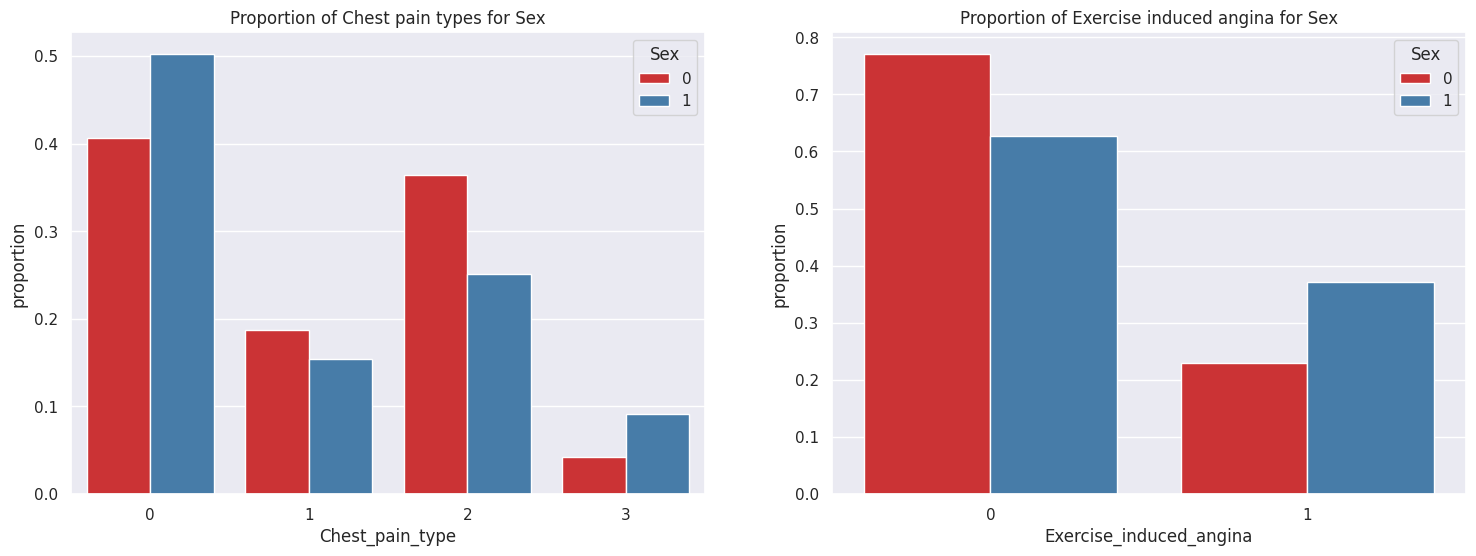

In [ ]:
def symptoms_features_sex(data):
    """
    Plot bar charts of chest pain type and exercise induced angina for Sex.
    """
    fig = plt.figure(figsize=(18, 6))

    # Chest pain types for Sex
    plt.subplot(1, 2, 1)
    data['Chest_pain_type'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Chest_pain_type', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Chest pain types for Sex')


    # Exercise induced angina for Sex
    plt.subplot(1, 2, 2)
    data['Exercise_induced_angina'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Exercise_induced_angina', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Exercise induced angina for Sex')
    plt.show()


symptoms_features_sex(df);

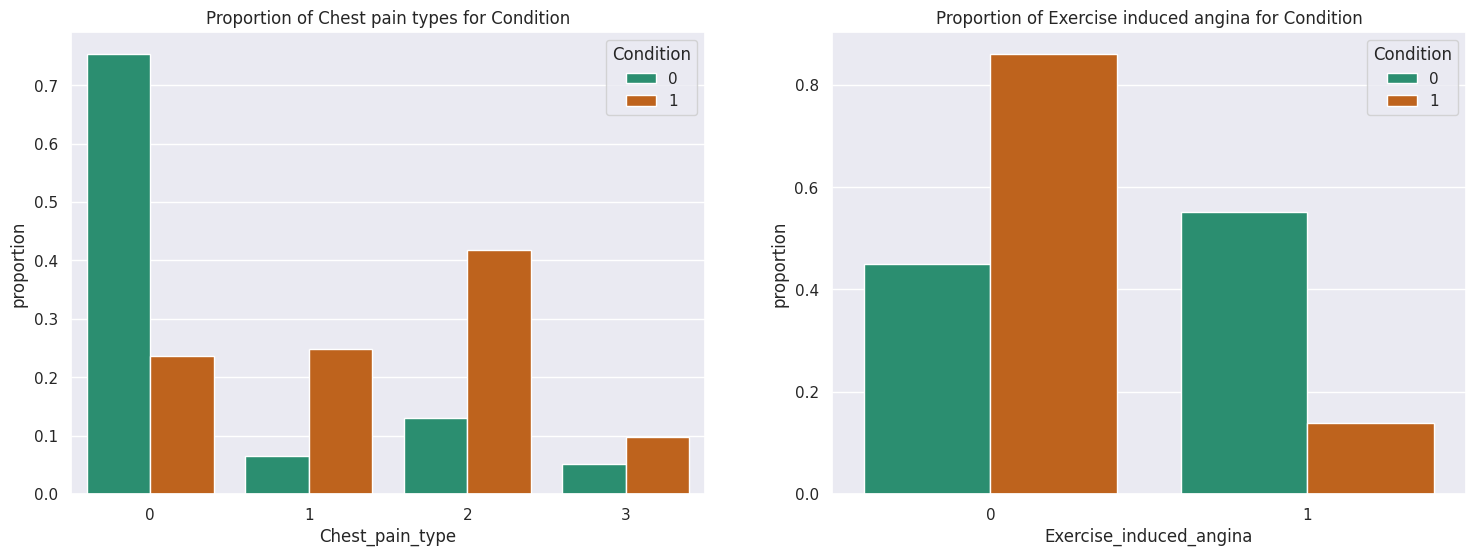

In [ ]:
def symptoms_features_condition(data):
    """
    Plot bar charts of chest pain type and exercise induced angina for Condition.
    """
    fig = plt.figure(figsize=(18, 6))

    plt.subplot(1, 2, 1)
    data['Chest_pain_type'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Chest_pain_type', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of Chest pain types for Condition')

    plt.subplot(1, 2, 2)
    data['Exercise_induced_angina'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Exercise_induced_angina', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of Exercise induced angina for Condition')
    plt.show()


symptoms_features_condition(df);

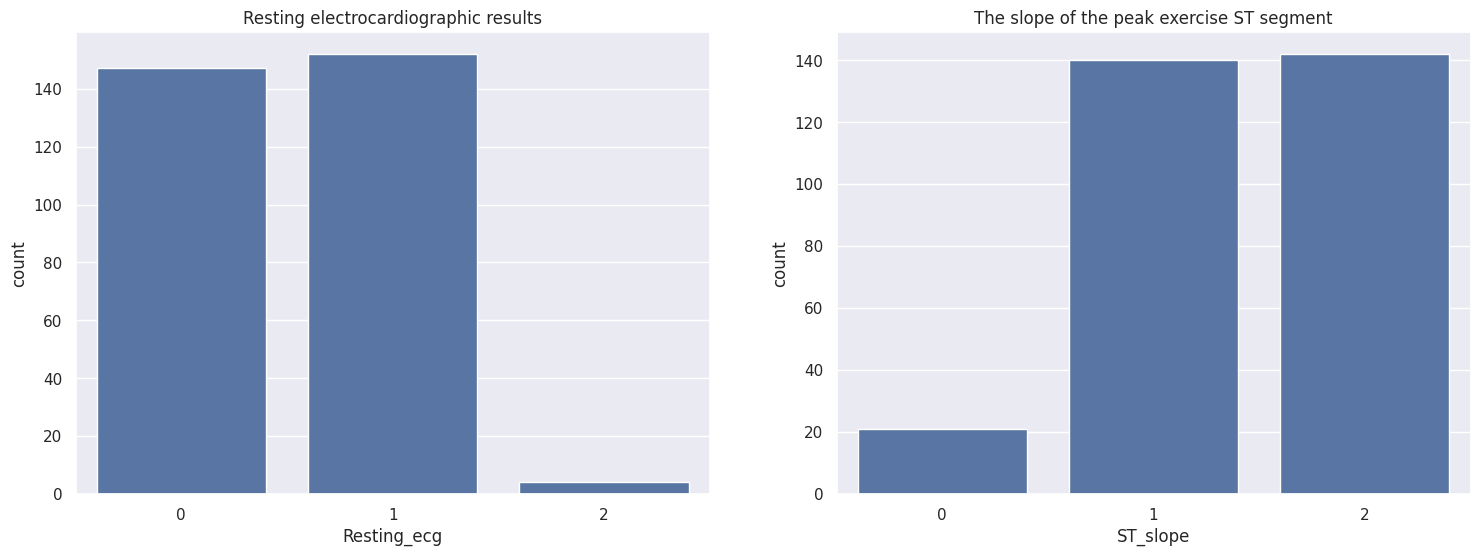

In [ ]:
def heart_functions(data):
    """
    Make a bar chart of Resting_ecg and ST_slope.
    """
    plt.figure(figsize=(18, 6))

    # Resting_ecg
    plt.subplot(1, 2, 1)
    sns.countplot(x='Resting_ecg', data=data)
    plt.title('Resting electrocardiographic results')

    # ST_slope
    plt.subplot(1, 2, 2)
    sns.countplot(x='ST_slope', data=data)
    plt.title('The slope of the peak exercise ST segment')
    plt.show()


heart_functions(df);


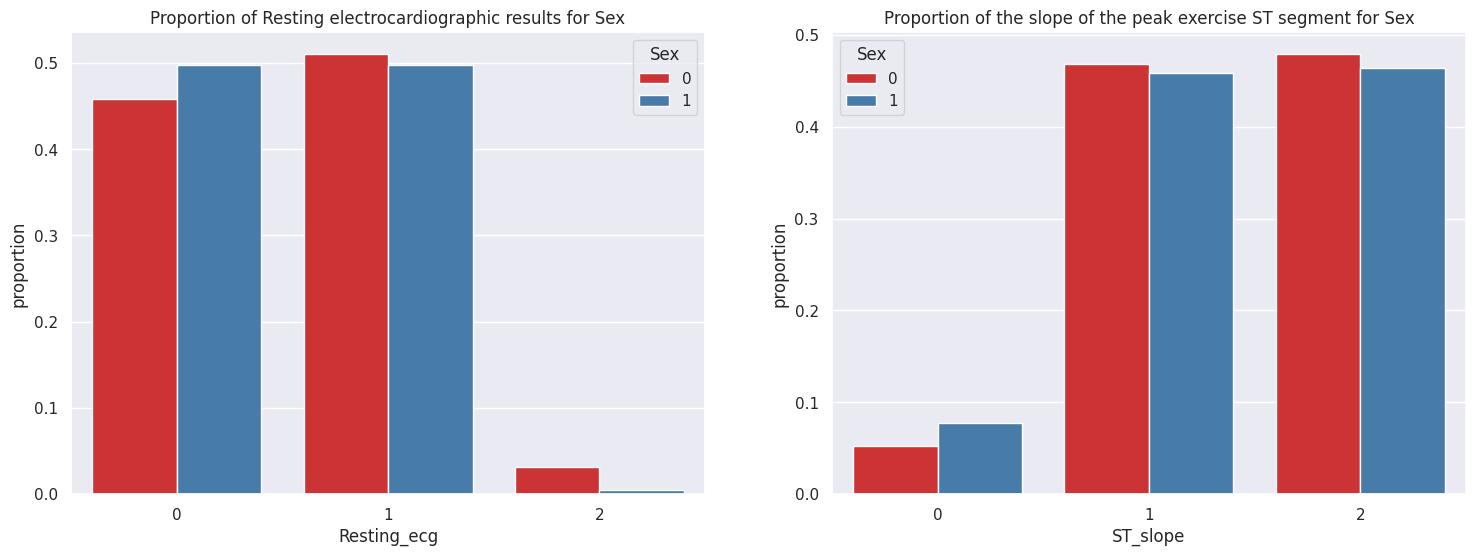

In [ ]:
def heart_functions_sex(data):
    """
    Plot the proportion of Resting_exc and ST_slope for Sex.
    """
    plt.figure(figsize=(18, 6))

    # Resting_ecg
    plt.subplot(1, 2, 1)
    data['Resting_ecg'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Resting_ecg', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Resting electrocardiographic results for Sex')

    # ST_slope
    plt.subplot(1, 2, 2)
    data['ST_slope'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='ST_slope', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of the slope of the peak exercise ST segment for Sex')
    plt.show()


heart_functions_sex(df);

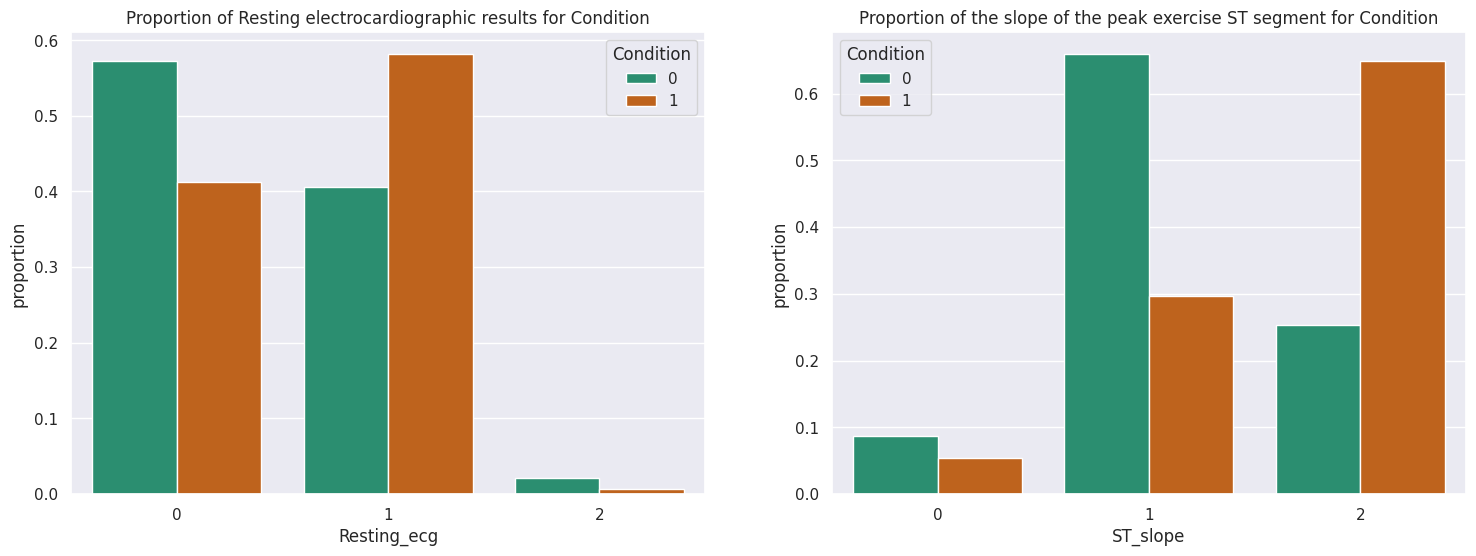

In [ ]:
def heart_functions_condition(data):
    """
    Plot the proportion of Resting_exc and ST_slope for Condition.
    """
    plt.figure(figsize=(18, 6))

    # Resting_ecg
    plt.subplot(1, 2, 1)
    data['Resting_ecg'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Resting_ecg', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of Resting electrocardiographic results for Condition')


    # ST_slope
    plt.subplot(1, 2, 2)
    data['ST_slope'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='ST_slope', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of the slope of the peak exercise ST segment for Condition')
    plt.show()


heart_functions_condition(df);


<ipython-input-24-98eed1dfc656>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-24-98eed1dfc656>:22: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-24-98eed1dfc656>:23: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use 

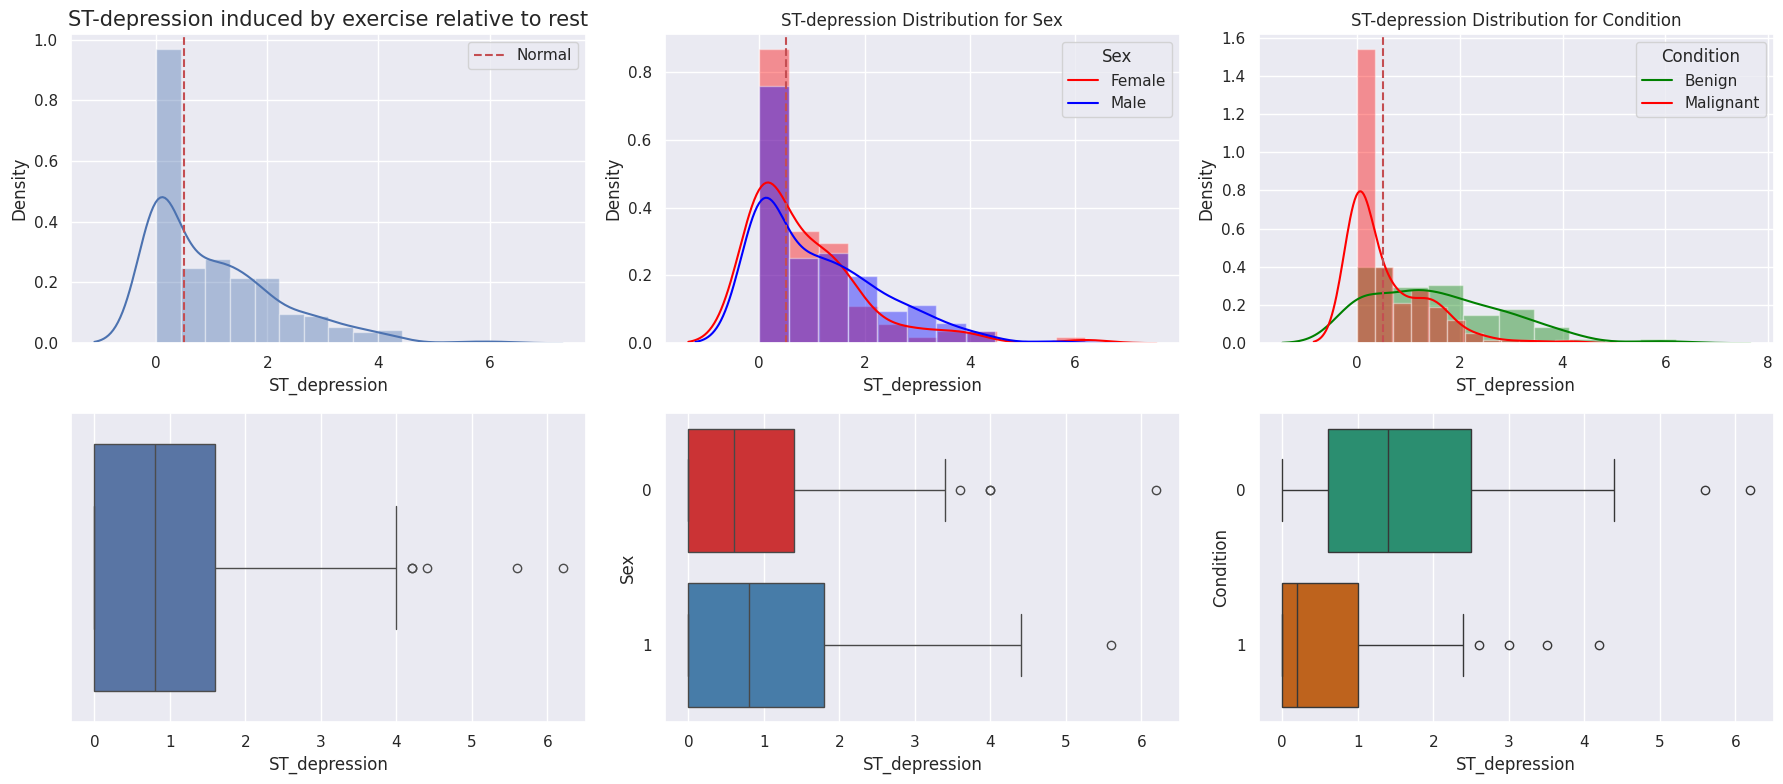

In [ ]:
def heart_functions_sex(data):
    """
    Make a standard distribution of ST_depression and distributions for Sex and Condition.
    """
    fig = plt.figure(figsize=(18, 8))

    # ST-depression induced by exercise relative to rest
    plt.subplot(2, 3, 1)
    sns.distplot(data['ST_depression'])
    plt.title('ST-depression induced by exercise relative to rest', fontsize=15)
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')
    plt.legend()

    plt.subplot(2, 3, 4)
    sns.boxplot(data['ST_depression'], orient='h')


    # ST-depression for Sex
    plt.subplot(2, 3, 2)
    chol_female = data[data['Sex']==0]['ST_depression']
    chol_male = data[data['Sex']==1]['ST_depression']
    sns.distplot(chol_female, color='Red')
    sns.distplot(chol_male, color='Blue')
    plt.title('ST-depression Distribution for Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['ST_depression'], y=data['Sex'],
                palette='Set1', orient='h')


    # ST-depression for Condition
    plt.subplot(2, 3, 3)
    thalach_b = data[data['Condition']==0]['ST_depression']
    thalach_m = data[data['Condition']==1]['ST_depression']
    sns.distplot(thalach_b, color='Green')
    sns.distplot(thalach_m, color='Red')
    plt.title('ST-depression Distribution for Condition')
    plt.gca().legend(title='Condition', labels=['Benign','Malignant'])
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['ST_depression'], y=data['Condition'],
                palette='Dark2', orient='h')

    plt.tight_layout()
    plt.show()


heart_functions_sex(df);

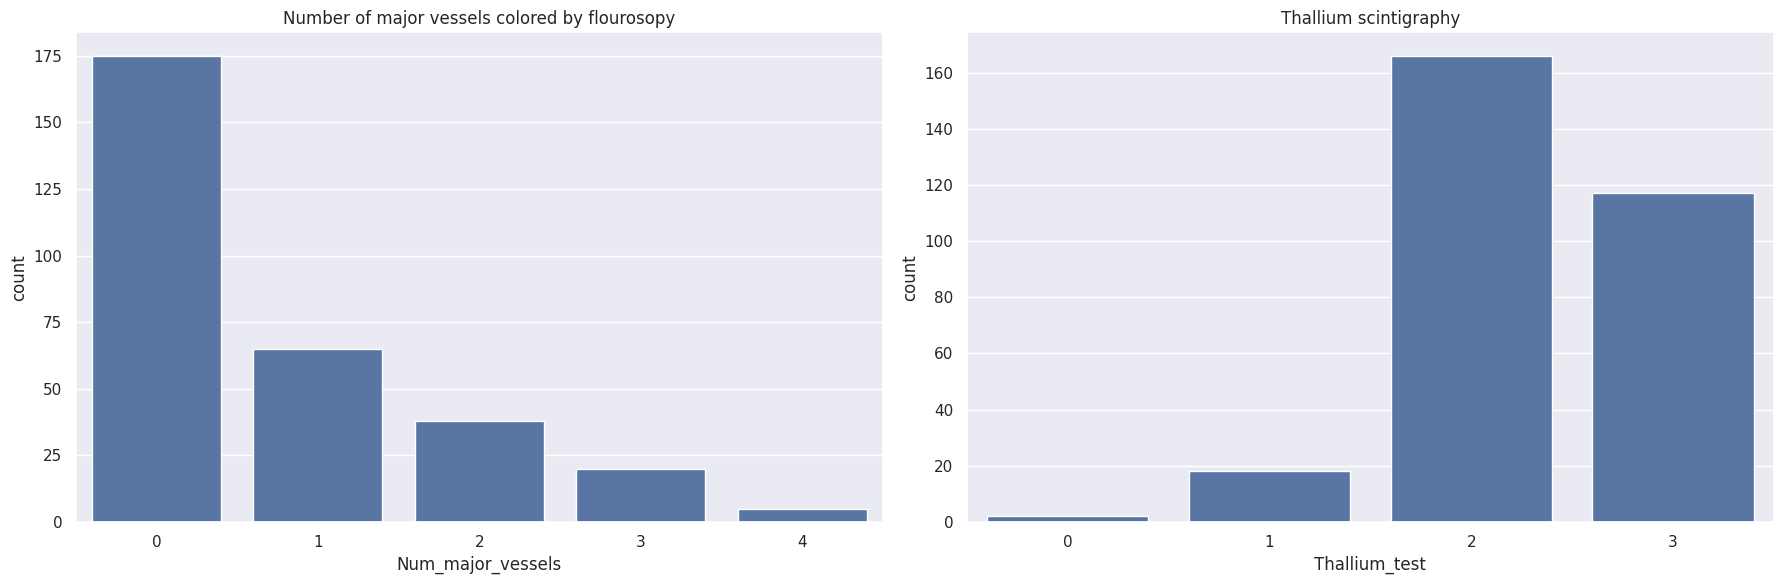

In [ ]:
def heart_functions2(data):
    """
    EDA with numeric variables
    """
    fig = plt.figure(figsize=(18, 6))

    # Num_major_vessels
    plt.subplot(1, 2, 1)
    sns.countplot(x='Num_major_vessels', data=data)
    plt.title('Number of major vessels colored by flourosopy')

    # Thallium
    plt.subplot(1, 2, 2)
    sns.countplot(x='Thallium_test', data=data)
    plt.title('Thallium scintigraphy')

    plt.tight_layout()
    plt.show()


heart_functions2(df);

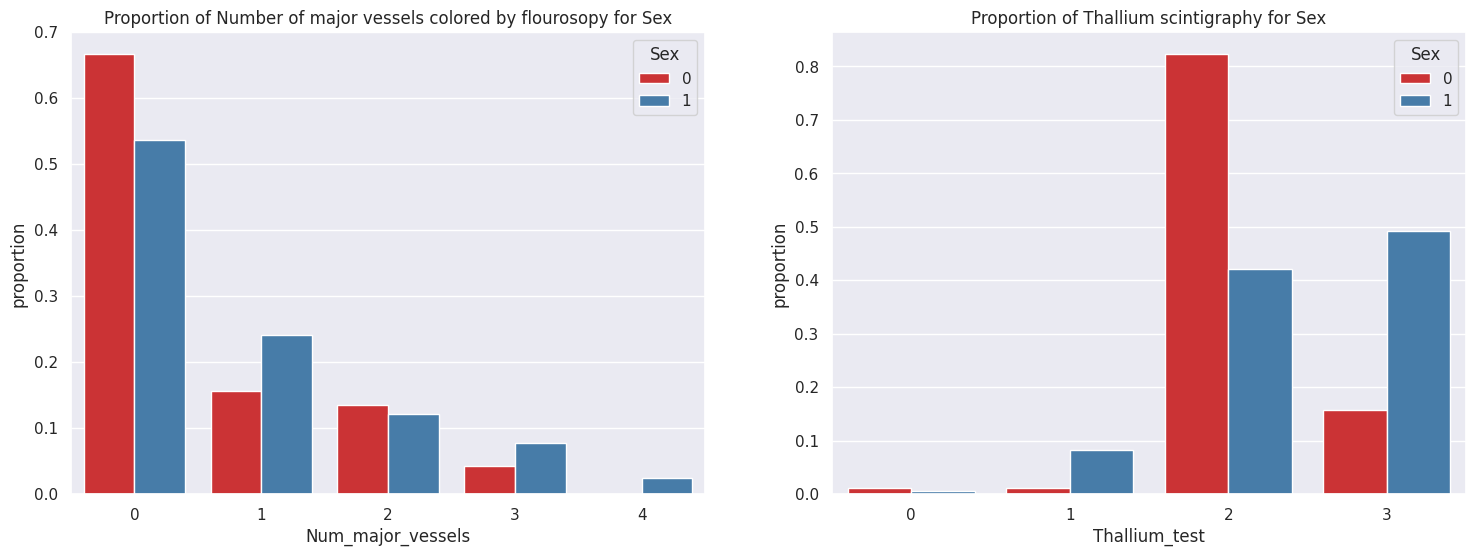

In [ ]:
def heart_functions2_sex(data):
    """
    Plot proportions of Num_major_vessels and Thallium_test for Sex.
    """
    plt.figure(figsize=(18, 6))

    # Num_major_vessels
    plt.subplot(1, 2, 1)
    data['Num_major_vessels'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Num_major_vessels', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Number of major vessels colored by flourosopy for Sex')

    # Thallium test
    plt.subplot(1, 2, 2)
    data['Thallium_test'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Thallium_test', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Thallium scintigraphy for Sex')
    plt.show()


heart_functions2_sex(df);

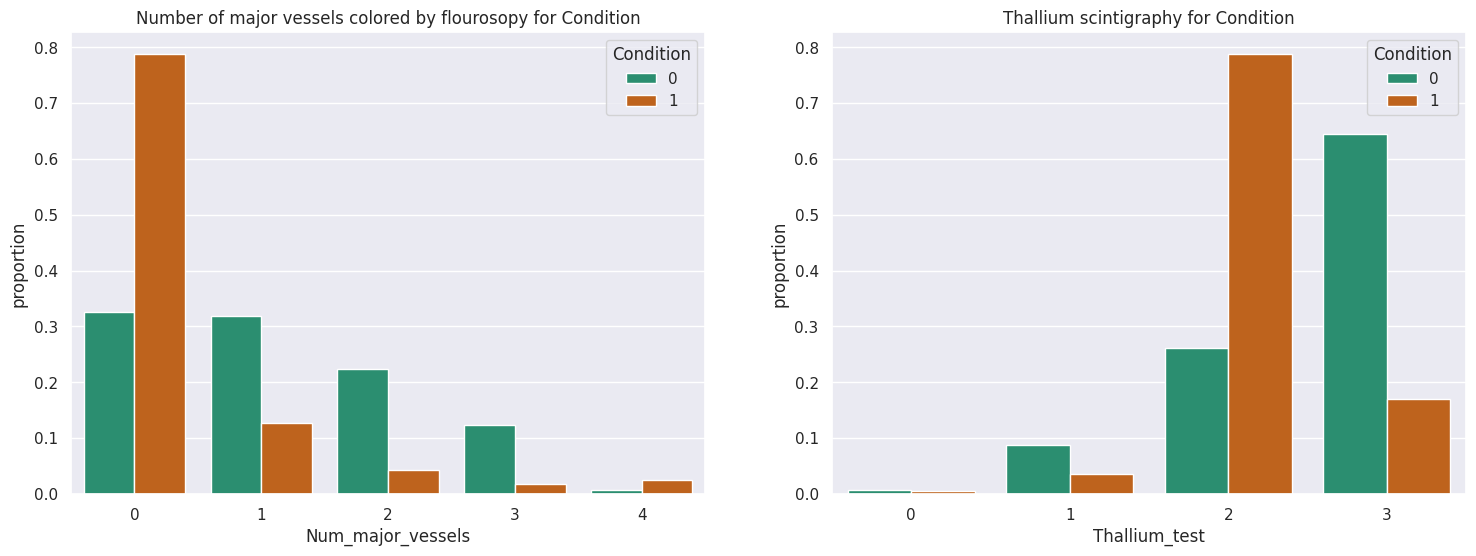

In [ ]:
def heart_functions2_condition(data):
    """
    Plot proportions of Num_major_vessels and Thallium_test for Condition.
    """
    plt.figure(figsize=(18, 6))

    # Num_major_vessels
    plt.subplot(1, 2, 1)
    data['Num_major_vessels'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Num_major_vessels', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Number of major vessels colored by flourosopy for Condition')

    # ST_slope
    plt.subplot(1, 2, 2)
    data['Thallium_test'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Thallium_test', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Thallium scintigraphy for Condition')
    plt.show()


heart_functions2_condition(df);

<ipython-input-28-c9c6d2e3639d>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-28-c9c6d2e3639d>:20: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-28-c9c6d2e3639d>:21: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use 

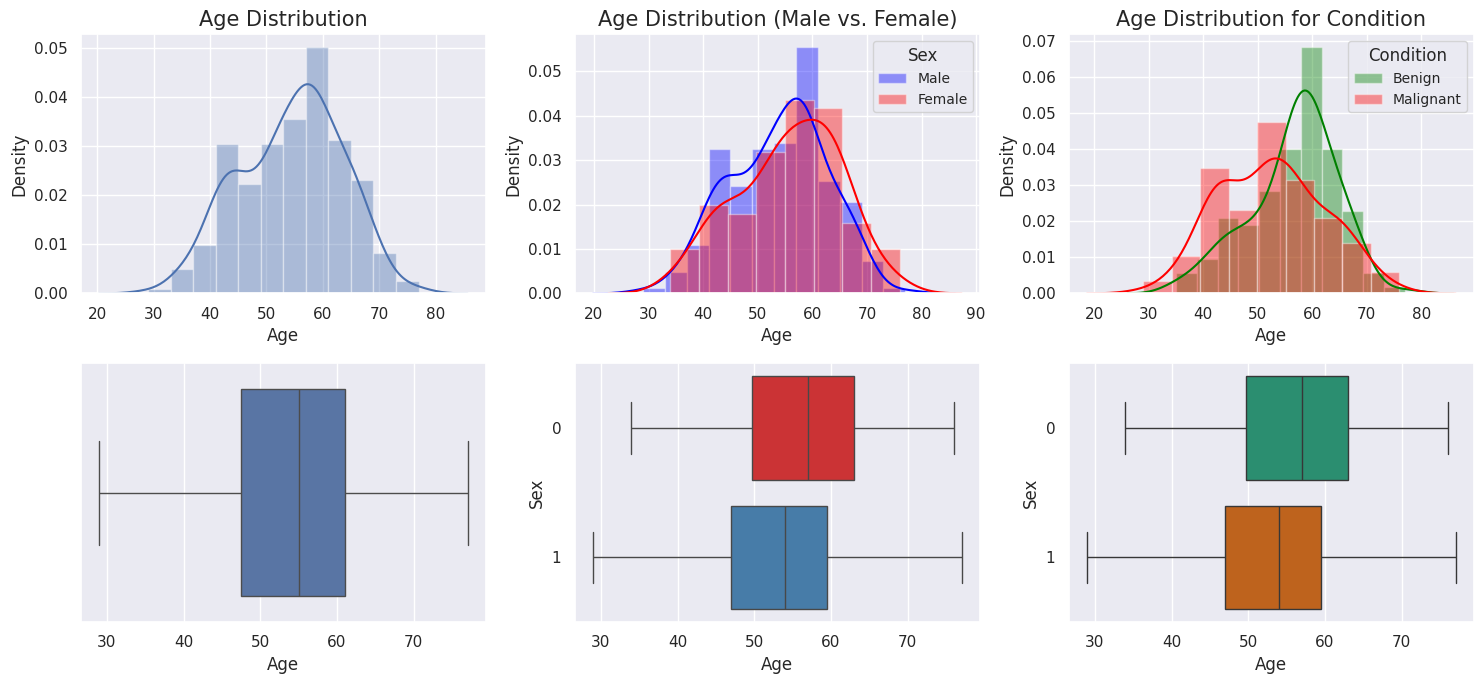

In [ ]:
def age_distribution(data):
    """
    Make a standard distribution and distributions for Sex
    """
    fig = plt.figure(figsize=(15, 7))

    # Age distribution
    plt.subplot(2, 3, 1)
    sns.distplot(data['Age'])
    plt.title('Age Distribution', fontsize=15)

    plt.subplot(2, 3, 4)
    sns.boxplot(data['Age'], orient='h')


    # Age distribution for sex
    plt.subplot(2, 3, 2)
    female = df[df['Sex']==0]['Age']
    male = df[df['Sex']==1]['Age']
    sns.distplot(male, color='Blue', label='Male')
    sns.distplot(female, color='Red', label='Female')
    plt.title('Age Distribution (Male vs. Female)', fontsize=15)
    plt.legend(title='Sex', fontsize=10)

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['Age'], y=data['Sex'], orient='h', palette='Set1')


    # Age distribution for Condition
    plt.subplot(2, 3, 3)
    benign = df[df['Condition']==0]['Age']
    malignant = df[df['Condition']==1]['Age']

    sns.distplot(benign, color='Green', label='Benign')
    sns.distplot(malignant, color='Red', label='Malignant')
    plt.title('Age Distribution for Condition', fontsize=15)
    plt.legend(title='Condition', fontsize=10)

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Age'], y=data['Sex'], orient='h', palette='Dark2')

    plt.tight_layout()
    plt.show()


age_distribution(df)

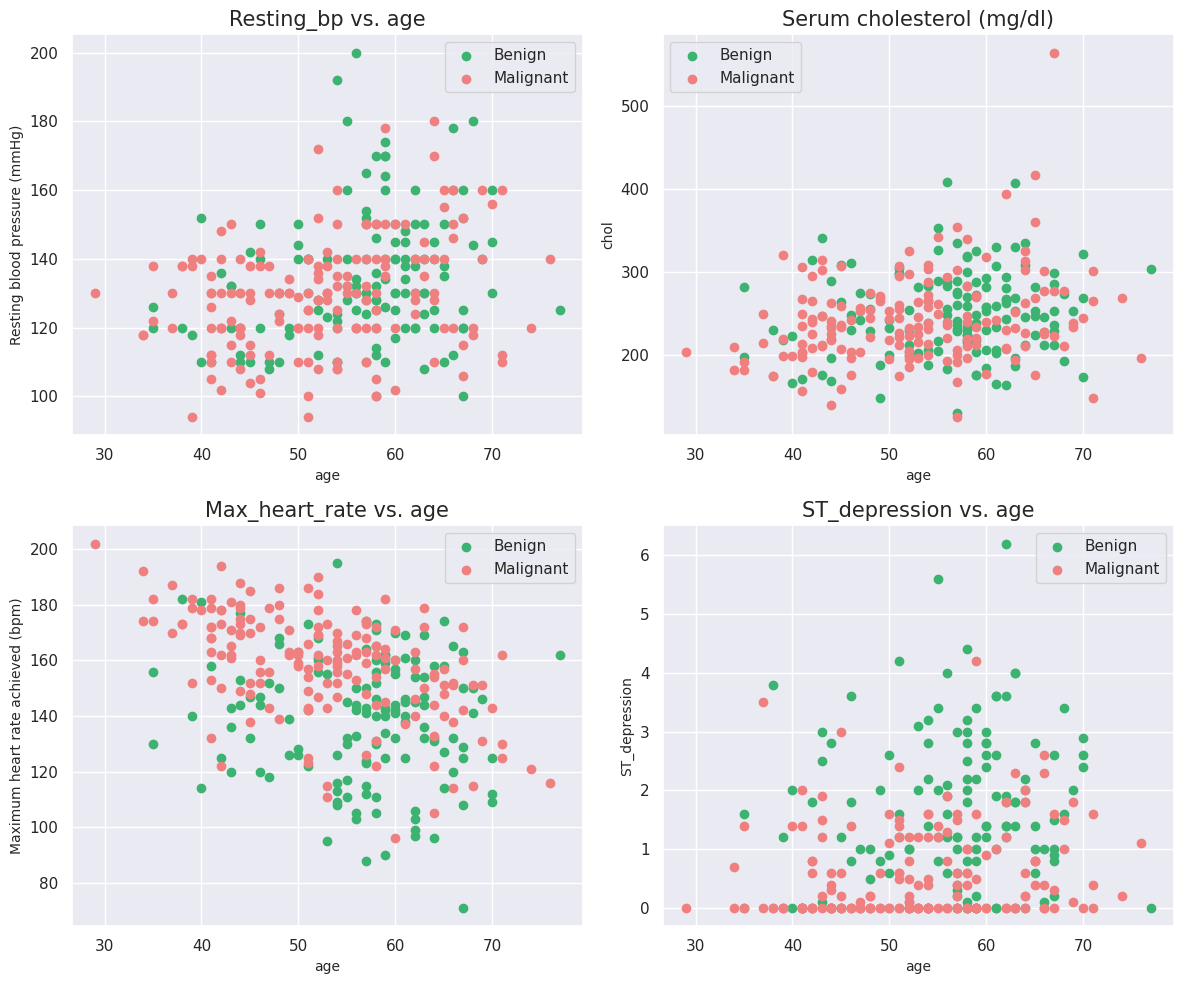

In [ ]:
def numeric_features_vs_age(data):
    """
    Effects of features for heart disease by age
    """
    benign = data.Condition==0
    malignant = data.Condition==1

    age_benign = data.Age[benign]
    age_malignant = data.Age[malignant]

    b_color = 'MediumSeaGreen'
    m_color = 'LightCoral'

    fig = plt.figure(figsize=(12, 10))

    # Resting blood pressure (mmHg)
    plt.subplot(2, 2, 1)
    plt.scatter(x=age_benign, y=data.Resting_bp[benign], color=b_color)
    plt.scatter(x=age_malignant, y=data.Resting_bp[malignant], color=m_color)
    plt.title('Resting_bp vs. age', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age', fontsize=10)
    plt.ylabel('Resting blood pressure (mmHg)', fontsize=10)


    # Serum Cholesterol (mg/dl)
    plt.subplot(2, 2, 2)
    plt.scatter(x=age_benign, y=data.Cholesterol[benign], color=b_color)
    plt.scatter(x=age_malignant, y=data.Cholesterol[malignant], color=m_color)
    plt.title('Serum cholesterol (mg/dl)', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age', fontsize=10)
    plt.ylabel('chol', fontsize=10)


    # Maximum heart rate achieved (bpm)
    plt.subplot(2, 2, 3)
    plt.scatter(x=age_benign, y=data.Max_heart_rate[benign], color=b_color)
    plt.scatter(x=age_malignant, y=data.Max_heart_rate[malignant], color=m_color)
    plt.title('Max_heart_rate vs. age', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age',fontsize=10)
    plt.ylabel('Maximum heart rate achieved (bpm)', fontsize=10)


    # ST_depression
    plt.subplot(2, 2, 4)
    plt.scatter(x=age_benign, y=data.ST_depression[benign], color=b_color)
    plt.scatter(x=age_malignant, y=data.ST_depression[malignant], color=m_color)
    plt.title('ST_depression vs. age', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age',fontsize=10)
    plt.ylabel('ST_depression', fontsize=10)

    plt.tight_layout()
    plt.show()


numeric_features_vs_age(df);

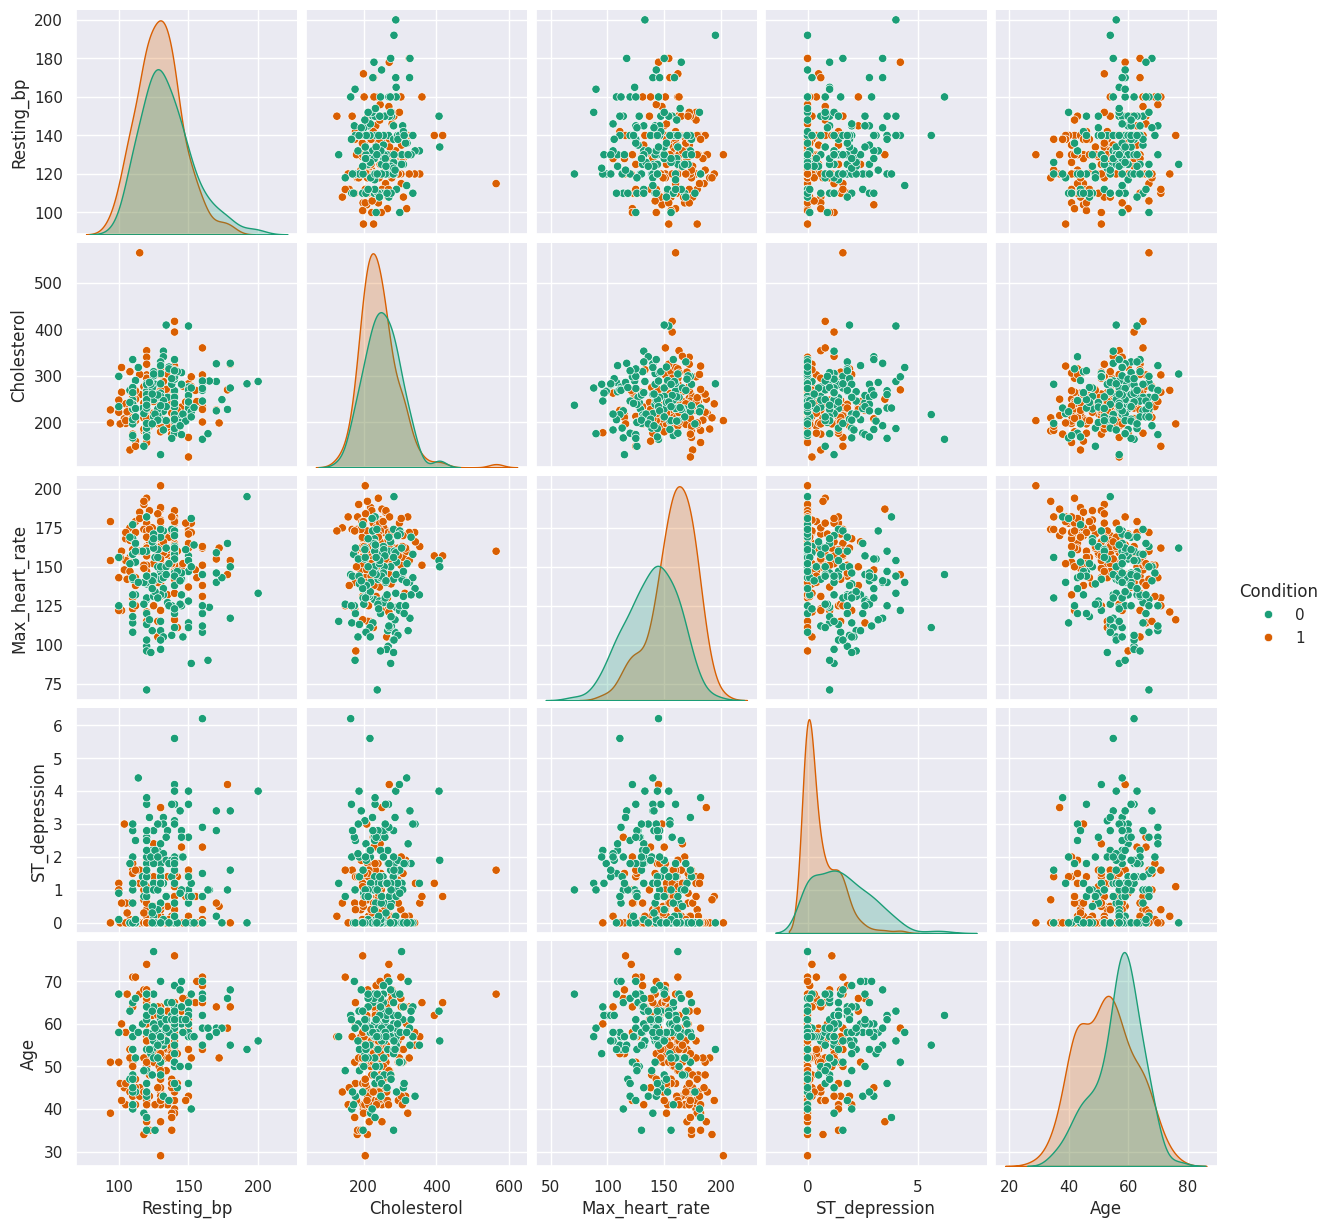

In [ ]:
sns.pairplot(df[['Resting_bp','Cholesterol','Max_heart_rate','ST_depression','Age', 'Condition']],hue='Condition', palette='Dark2');

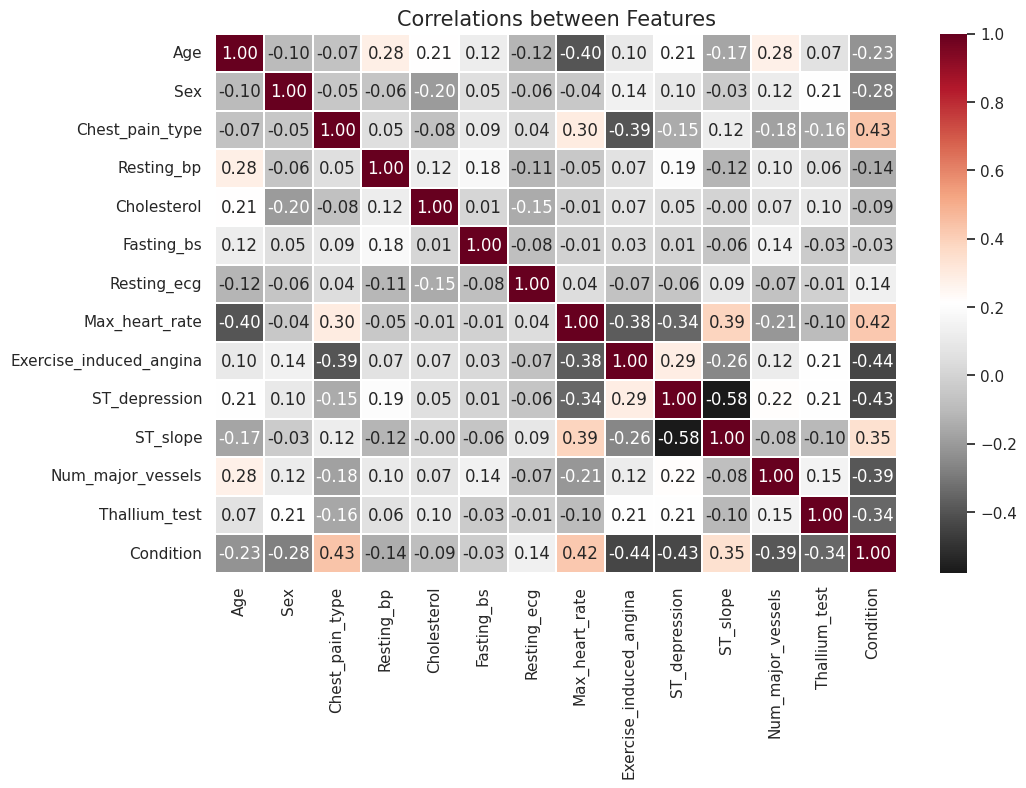

In [ ]:
def correlation_heatmap(data):
    """
    Correlation Heat Map of the features.
    """
    plt.figure(figsize=(11, 7))
    sns.heatmap(data.corr(), annot=True, linewidth=0.2,
                fmt='.2f', cmap='RdGy_r')
    plt.title('Correlations between Features', fontsize=15)
    plt.show()


correlation_heatmap(df);

# Classifying our machine learning models

We are evaluating 4 popular ML models for heart disease:

*  Logistic Regression
*  Decision Tree
*  Random Forest
*  K-Nearest Neighbors (KNN)

We should show that we have split, tested and trained the data and then we need to instantiate the model that we choose and train it using the X and Y variables. We first need to scale the data because some ML algorithims will require the data to be similar and some of the values inside of will have very different values which will cause inaccuraries.


# Data preprocessing
Before traning the following models, we must perform several important preprocessing steps
## Scaling


*   Initialise a `StandardScaler` and apply it to a list of columns
*   Applying a `StandardScaler` helps ML algorithims perform better by ensuring that features are on a similar scale


## One-Hot encoding


*   Converting categorical data using `pd.get_dummies()` to one-hot
encode categorical variables such as `restecg`, `cp`, `slope` and `thal`
*    Drop any dummy variable traps


## Feature/label seperation and train-test split



*   **Defining `x` and `y`**: the target label is stored in the column `target` and the rest of the features are used for training
*   **Splitting data**: the features and labels are split into training and test sets using `train_test_split()`, typically with an 80/20 split



### Scaling
Apply a `StandardScaler` to the columns below

In [ ]:
standard_scaler = StandardScaler()
rename_mapping = {
    "Age": "age",
    "Cholesterol": "chol",
    "Resting_bp": "trestbps",
    "ST_depression": "oldpeak",
    "Thallium_test": "thal",
    "Chest_pain_type": "cp",
    "Resting_ecg": "restecg",
    "ST_slope": "slope",
    "Condition": "target"
}
df.rename(columns=rename_mapping, inplace=True)
cols_to_scale = ["age", "chol", "trestbps", "thal", "oldpeak"]
df[cols_to_scale] = standard_scaler.fit_transform(df[cols_to_scale])
df.head()

,age,Sex,cp,trestbps,chol,Fasting_bs,restecg,Max_heart_rate,Exercise_induced_angina,oldpeak,slope,Num_major_vessels,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,150,0,1.087338,0,0,-2.148873,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,187,0,2.122573,0,0,-0.512922,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,172,0,0.310912,2,0,-0.512922,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,178,0,-0.206705,2,0,-0.512922,1
4,0.290464,0,0,-0.663867,2.082050,0,1,163,1,-0.379244,2,0,-0.512922,1


### One-hot encoding
Convert categorical data to one-hote encode categorigal variables and drop any dummy variable traps

In [ ]:
heart = pd.get_dummies(df, columns = ['restecg', 'cp', 'slope', 'thal'], drop_first=True)

Seperate the features from target labels to find healthy or sick

In [ ]:
labels = heart['target']
features = heart.drop(['target'], axis = 1)

Split features and target labels into a training set and a test set

In [ ]:
features_train , features_test, labels_train, labels_test = train_test_split(features, labels, test_size= 0.2, random_state=42)

## Random forest evaluation
Random Forest is an ensemble learning method that combines multiple decision trees to improve predictive performance and reduce overfitting. In our implementation, we use shallow trees (with a limited maximum depth) to keep the model simple and interpretable.

### Hyperparamater tuning
*   A loop tests several values for the number of trees `n_estimators` ranging from 10 to 5000
*   For each value a `RandomForestClassifier` is instantiated with `max_depth=1` and `random_state=1` for reproducability
*   The model is trained and its accuracy on the test set is recorded



Random Forest Accuracy Scores:

 [0.8360655737704918, 0.8688524590163934, 0.8688524590163934, 0.8524590163934426, 0.8688524590163934, 0.8688524590163934, 0.8688524590163934, 0.8688524590163934]


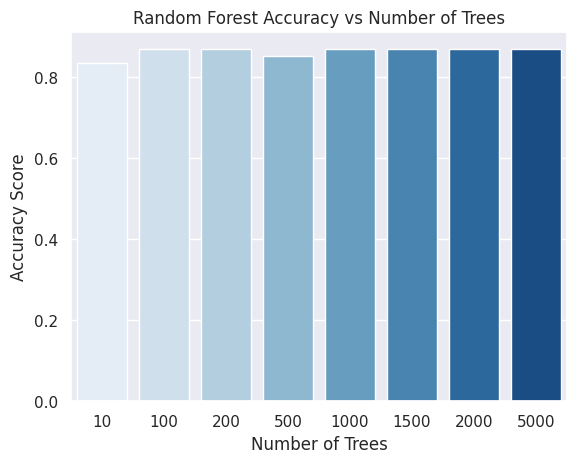

In [ ]:
random_forest_scores = []
trees = [10, 100, 200, 500, 1000, 1500, 2000, 5000]
for x in trees:
    random_forest = RandomForestClassifier(n_estimators=x, random_state=1, max_depth=1)
    random_forest.fit(features_train, labels_train)
    random_forest_scores.append(random_forest.score(features_test, labels_test))

print("Random Forest Accuracy Scores:", random_forest_scores)

# Plotting with corrected Seaborn syntax
sns.barplot(x=trees, y=random_forest_scores, palette='Blues')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy Score')
plt.title('Random Forest Accuracy vs Number of Trees')
plt.show()

### Final model training

*    Choose a ranom forest with 1000 trees, train it and then print the accuracy

In [ ]:
randomForest = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_depth=1)
randomForest.fit(features_train, labels_train);
randomForest.score(features_test, labels_test)

score = round(randomForest.score(features_test,labels_test), 3) *100

print(f"Random Forest accuracy is {score}%")

Random Forest accuracy is 86.9%


### Feature importance



*   Using `permutation_importance`, we compute the importance of each feature and display both a printed list and a bar chart

Feature weights:
thal_2                           0.0393 ±   0.0410
ca                               0.0393 ±   0.0234
thal_3                           0.0197 ±   0.0230
oldpeak                          0.0180 ±   0.0186
exang                            0.0098 ±   0.0131
slope_2                          0.0098 ±   0.0197
slope_1                          0.0098 ±   0.0197
age                              0.0082 ±   0.0110
thalach                          0.0066 ±   0.0080
sex                              0.0066 ±   0.0080
cp_2                             0.0049 ±   0.0105
cp_1                             0.0016 ±   0.0088
restecg_2                        0.0000 ±   0.0000
cp_3                             0.0000 ±   0.0000
fbs                              0.0000 ±   0.0000
chol                             0.0000 ±   0.0000
thal_1                           0.0000 ±   0.0000
trestbps                         0.0000 ±   0.0000
restecg_1                        0.0000 ±   0.0000


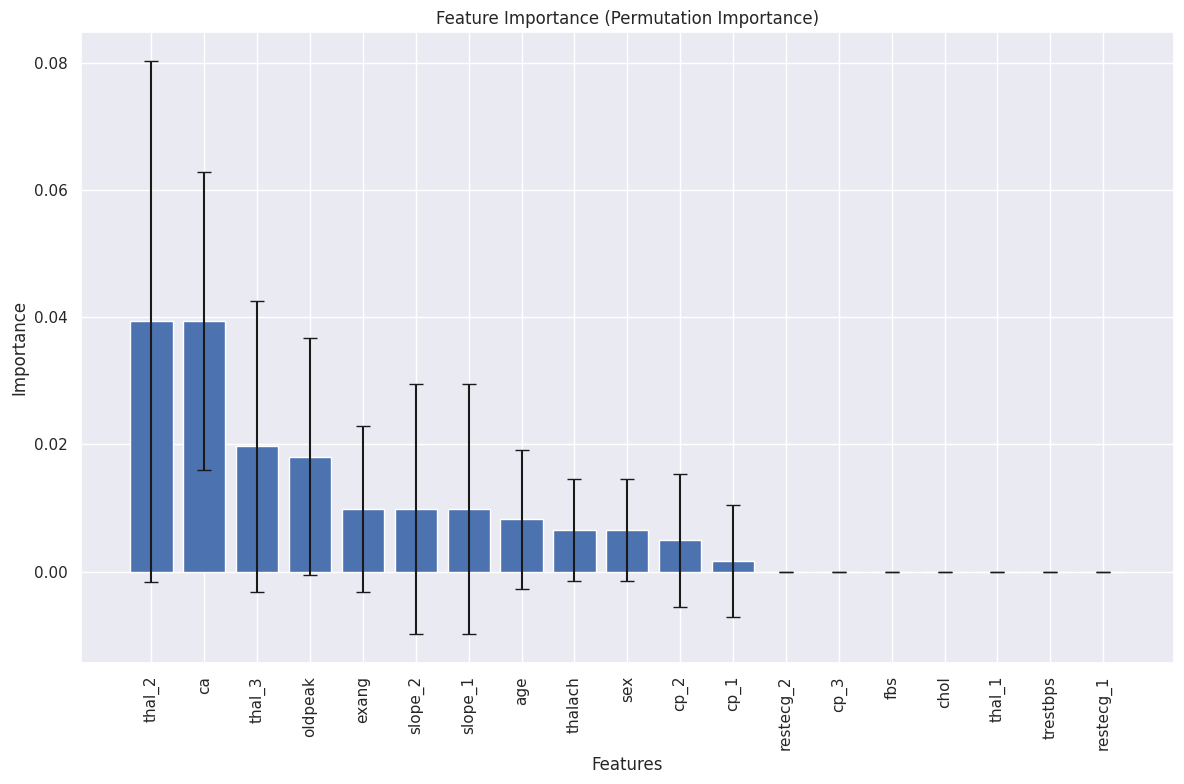

In [ ]:
result = permutation_importance(randomForest, features_test, labels_test, n_repeats=10, random_state=42)
# Create a DataFrame with feature importances
feature_importance = pd.DataFrame({
    'feature': features_test.columns,
    'importance': result.importances_mean,
    'std': result.importances_std
})

# Sort features by importance
feature_importance = feature_importance.sort_values('importance', ascending=False).reset_index(drop=True)

# Print feature importances
print("Feature weights:")
for idx, row in feature_importance.iterrows():
    print(f"{row['feature']:<30} {row['importance']:>8.4f} ± {row['std']:>8.4f}")

# Visualize feature importances
plt.figure(figsize=(12, 8))
plt.bar(feature_importance['feature'], feature_importance['importance'], yerr=feature_importance['std'], capsize=5)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (Permutation Importance)')
plt.tight_layout()
plt.show()


### Confusion matrix
*    Predictions are made on the test set and a confusion matrix is visualised using a heatmao to show the number of true positives, false positives, etc.

Text(0.5, 1.0, 'Random Forest: Confusion Matrix')

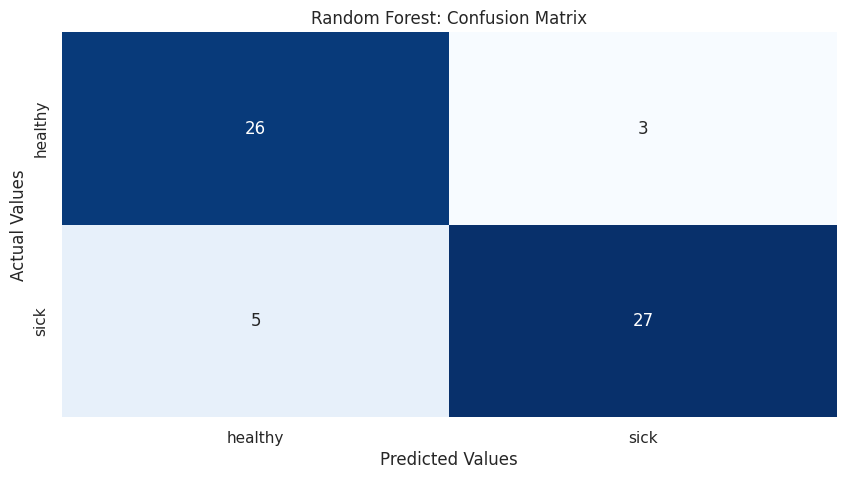

In [ ]:
labels_predicted = randomForest.predict(features_test)
plt.subplots(figsize=(10,5))

conf_mat = confusion_matrix(labels_test, labels_predicted)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['healthy', 'sick'], yticklabels=['healthy', 'sick'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Random Forest: Confusion Matrix')

## K nearest neighbours
K-Nearest Neighbors is a non-parametric, instance-based learning method that predicts the class of a new data point by looking at the most common class among its K nearest neighbors in the feature space. The choice of K is critical to model performance.


### Hyperparameter Tuning:  
  We varied the number of neighbors (K) from 1 to 29 and recorded the corresponding accuracy scores on the test set. This iterative process helps in finding the optimal value of K that maximizes performance.

### Performance visualisation:
A line plot is used to show how the model’s accuracy changes with different values of K. This visual aid makes it easier to identify the optimal K.

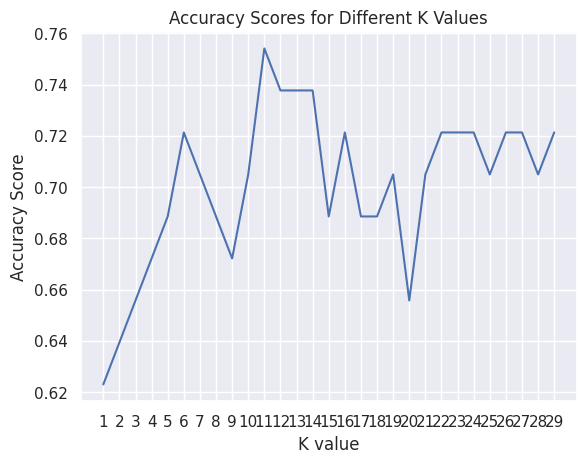

Max K Nearest Neighbors Accuracy is 75.41%
Best K is 11


In [ ]:
accuracyScores = []

# Loop through different values of k
for x in range(1, 30):
    knn2 = KNeighborsClassifier(n_neighbors=x)
    knn2.fit(features_train, labels_train)
    accuracyScores.append(knn2.score(features_test, labels_test))

# Plot the accuracy scores
sns.lineplot(x=range(1, 30), y=accuracyScores)  # Use x= and y=
plt.xticks(np.arange(1, 30, 1))
plt.xlabel("K value")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Different K Values")
plt.show()

# Find the best k value and max accuracy score
best_k = accuracyScores.index(max(accuracyScores)) + 1
max_score = round((max(accuracyScores) * 100), 2)

print(f"Max K Nearest Neighbors Accuracy is {max_score}%")
print(f"Best K is {best_k}")

### Best K selection
The value of K with the highest accuracy is selected as the optimal hyperparameter, ensuring that the model achieves a good balance between overfitting (low K) and underfitting (high K).


Feature Importances:
thalach                          0.2262 ±   0.0538
chol                             0.0230 ±   0.0167
slope_2                          0.0115 ±   0.0075
oldpeak                          0.0115 ±   0.0075
slope_1                          0.0115 ±   0.0075
thal_2                           0.0098 ±   0.0080
thal_3                           0.0082 ±   0.0082
ca                               0.0066 ±   0.0080
cp_2                             0.0033 ±   0.0066
thal_1                           0.0000 ±   0.0000
cp_3                             0.0000 ±   0.0000
restecg_1                        0.0000 ±   0.0000
cp_1                             0.0000 ±   0.0000
restecg_2                        0.0000 ±   0.0000
sex                              0.0000 ±   0.0000
exang                            0.0000 ±   0.0000
fbs                              0.0000 ±   0.0000
trestbps                        -0.0016 ±   0.0297
age                             -0.0049 ±   0.0244


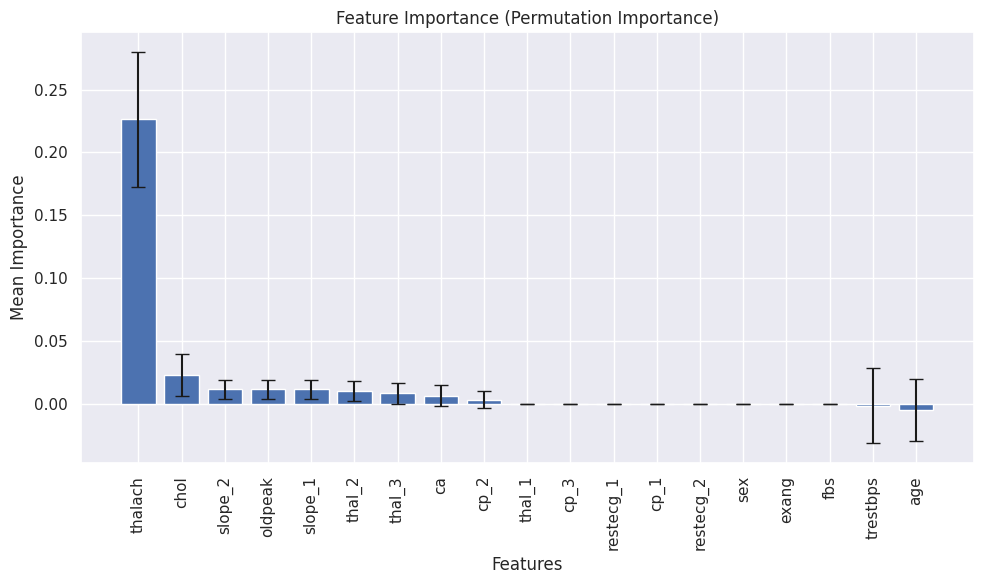

In [ ]:
result = permutation_importance(knn2, features_test, labels_test, n_repeats=10, random_state=1)

# Create a DataFrame with the results
importance_df = pd.DataFrame({
    'feature': features_test.columns,
    'importance': result.importances_mean,
    'std': result.importances_std
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values('importance', ascending=False).reset_index(drop=True)

# Print the results
print("Feature Importances:")
for idx, row in importance_df.iterrows():
    print(f"{row['feature']:<30} {row['importance']:>8.4f} ± {row['std']:>8.4f}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.bar(importance_df['feature'], importance_df['importance'], yerr=importance_df['std'], capsize=5)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Mean Importance')
plt.title('Feature Importance (Permutation Importance)')
plt.tight_layout()
plt.show()

  ### Feature importance and evaluation
  
  Similar to Random Forest, permutation importance is applied to the KNN model to gauge the impact of individual features. Additionally, we generate a confusion matrix and a classification report (including metrics like precision, recall, and F1 score) to comprehensively assess the model’s performance.

Text(0.5, 1.0, 'K Nearest Neighbors: Confusion Matrix')

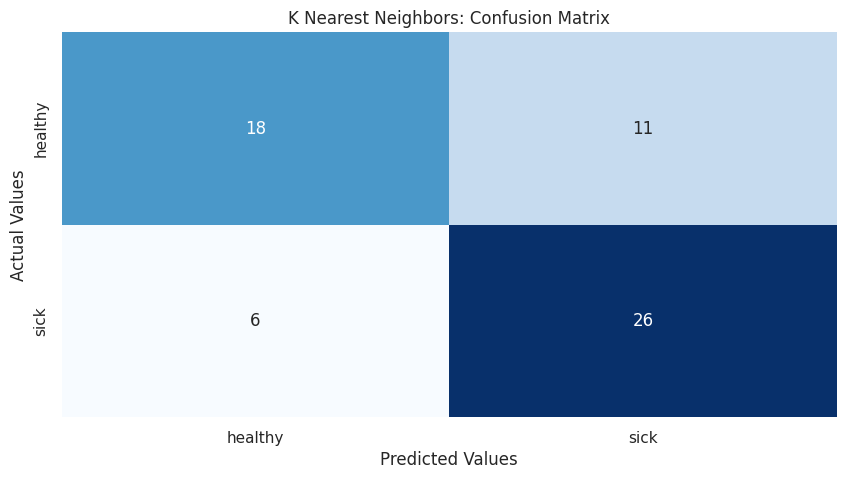

In [ ]:
labels_predicted = knn2.predict(features_test)
plt.subplots(figsize=(10,5))

conf_mat = confusion_matrix(labels_test, labels_predicted)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['healthy', 'sick'], yticklabels=['healthy', 'sick'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('K Nearest Neighbors: Confusion Matrix')

In [ ]:
print(classification_report(labels_test, labels_predicted, target_names = ['healthy', 'sick']))


              precision    recall  f1-score   support

     healthy       0.75      0.62      0.68        29
        sick       0.70      0.81      0.75        32

    accuracy                           0.72        61
   macro avg       0.73      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61



## Logistic regression evaluation
Logistic Regression is a linear model used for binary classification. In our heart disease detection project, it estimates the probability of a patient having heart disease by applying the logistic (sigmoid) function to a linear combination of input features. This model is popular in medical applications because of its simplicity and interpretability.

### Data preprocessing
Before training, the features are scaled (using a method like StandardScaler) to ensure they have similar ranges. This is crucial because Logistic Regression can be sensitive to the scale of the input features. Additionally, categorical variables are transformed via one-hot encoding, ensuring that all inputs are numerical.

### Model training
The Logistic Regression model is instantiated (typically with a solver like `'lbfgs'`) and then trained using the preprocessed training data. The training process involves finding the optimal set of coefficients that minimize the cost function (often the log-loss) on the training set.

### Prediction and scoring
  Once trained, the model predicts class probabilities for the test set, which are then thresholded (commonly at 0.5) to assign binary class labels (healthy vs. sick). The overall performance is measured using accuracy, which is the proportion of correctly classified instances in the test set.

In [ ]:
logisticRegression = LogisticRegression( solver='lbfgs')
logisticRegression.fit(features_train,labels_train)
logisticRegression.score(features_test,labels_test)


score = round(logisticRegression.score(features_test,labels_test), 3) *100
print(f"Logistic Regression accuracy is {score}%")

Logistic Regression accuracy is 88.5%


### Performance evaluation
  - **Confusion Matrix:** Visualizes the distribution of true positives, true negatives, false positives, and false negatives, providing deeper insight into model performance.
  - **Classification Report:** Provides detailed metrics such as precision, recall, and F1 score for each class, highlighting the model’s strengths and weaknesses.
  - **Permutation Importance:** This method is applied to understand the influence of each feature on the predictions. It shows how random shuffling of each feature impacts model accuracy, thereby ranking features by importance.

Feature Importances:
ca                               0.0623 ±   0.0365
cp_2                             0.0590 ±   0.0131
thalach                          0.0393 ±   0.0210
restecg_1                        0.0393 ±   0.0109
oldpeak                          0.0361 ±   0.0262
exang                            0.0197 ±   0.0177
thal_3                           0.0197 ±   0.0191
thal_2                           0.0164 ±   0.0207
sex                              0.0098 ±   0.0167
chol                             0.0082 ±   0.0082
slope_1                          0.0049 ±   0.0075
slope_2                          0.0049 ±   0.0075
trestbps                         0.0016 ±   0.0136
restecg_2                        0.0000 ±   0.0000
cp_3                             0.0000 ±   0.0000
thal_1                           0.0000 ±   0.0000
fbs                             -0.0016 ±   0.0049
cp_1                            -0.0033 ±   0.0066
age                             -0.0066 ±   0.0109


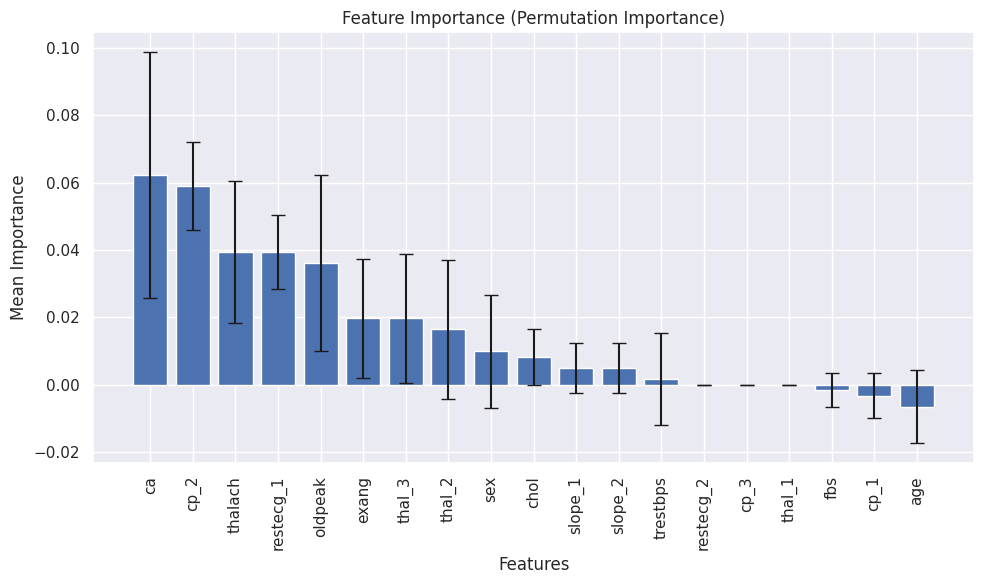

In [ ]:
result = permutation_importance(logisticRegression, features_test, labels_test, n_repeats=10, random_state=1)

# Create a DataFrame with the results
importance_df = pd.DataFrame({
    'feature': features_test.columns,
    'importance': result.importances_mean,
    'std': result.importances_std
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values('importance', ascending=False).reset_index(drop=True)

# Print the results in a readable format
print("Feature Importances:")
for idx, row in importance_df.iterrows():
    print(f"{row['feature']:<30} {row['importance']:>8.4f} ± {row['std']:>8.4f}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.bar(importance_df['feature'], importance_df['importance'], yerr=importance_df['std'], capsize=5)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Mean Importance')
plt.title('Feature Importance (Permutation Importance)')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Logistic Regression: Confusion Matrix')

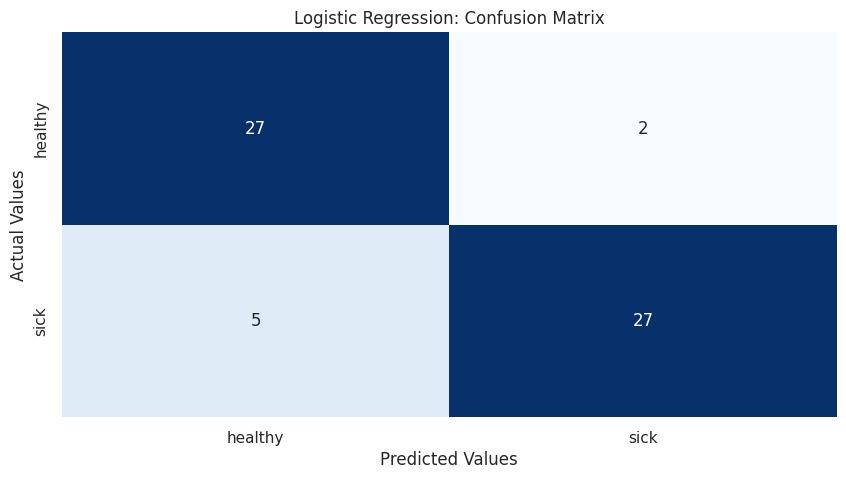

In [ ]:
labels_predicted = logisticRegression.predict(features_test)
plt.subplots(figsize=(10,5))

conf_mat = confusion_matrix(labels_test, labels_predicted)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['healthy', 'sick'], yticklabels=['healthy', 'sick'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Logistic Regression: Confusion Matrix')

In [ ]:
labels_predicted = logisticRegression.predict(features_test)
print(classification_report(labels_test, labels_predicted, target_names = ['healthy', 'sick']))

              precision    recall  f1-score   support

     healthy       0.84      0.93      0.89        29
        sick       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



### Naive bayes evaluation

Gaussian Naive Bayes is a probabilistic classifier based on applying Bayes' theorem with the “naive” assumption that features are independent given the class. Despite its simplicity, it can be effective for classification tasks, including medical diagnosis.

  ### Model training
  
  The Gaussian Naive Bayes classifier is trained on the preprocessed dataset. The model learns the probability distribution of each feature for each class.

  ### Performance evaluation
  After training, the model’s accuracy is evaluated on the test set. This overall accuracy provides an initial indication of performance.

In [ ]:
nb = GaussianNB()
nb.fit(features_train, labels_train)
nb.score(features_test,labels_test)

score = round(nb.score(features_test,labels_test), 3) *100

print(f"Naive Bayes accuracy is {score}%")

Naive Bayes accuracy is 86.9%


### Confusion matrix
A confusion matrix is generated to visualize how well the model distinguishes between healthy and sick cases. This helps identify any systematic misclassifications and provides insight into the model’s strengths and weaknesses.

Text(0.5, 1.0, 'Naive Bayes: Confusion Matrix')

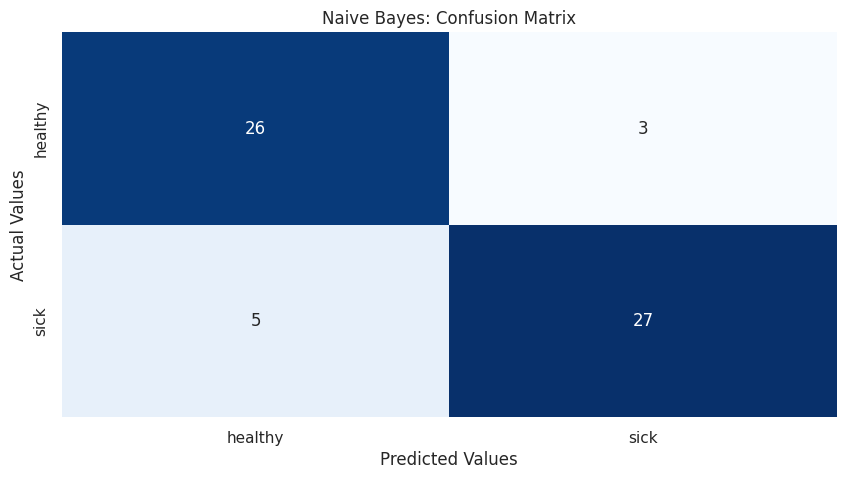

In [ ]:
labels_predicted = nb.predict(features_test)
plt.subplots(figsize=(10,5))

conf_mat = confusion_matrix(labels_test, labels_predicted)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['healthy', 'sick'], yticklabels=['healthy', 'sick'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Naive Bayes: Confusion Matrix')

# **Final model: logistic regression**


We chose logistic regression because of the following reasons:



*   **Simplicity**: Its mathematical foundation and linear decision boundary make it much easier to explain to the stakeholders. Its linear nature makes the model easy to understand and explain, which is particularly important in healthcare settings.
*   **Interpretability**: You can directly interpret the model coefficients and the permutation importance results. The coefficients from Logistic Regression can be directly interpreted, showing how each feature impacts the probability of heart disease.
*   **Balanced performance**: Logistic regression offers a great balance between performance and ease of explanation compared to other models such as random forest and KNN




It is most useful for binary classification tasks such as detecting heart disease. To evaluate the effectiveness of the model we created an interface below to easily pass data into the model so we can evaluate its output.

### Logistic regression interface
1. **Parameter Controls:**
   - **C Slider:**  
     A logarithmic slider that controls the regularization strength (`C`) of the Logistic Regression model. Lower values of `C` impose stronger regularization, which can prevent overfitting.
   - **Max Iter Slider:**  
     This slider sets the maximum number of iterations (`max_iter`) for the model's optimization process. Increasing this value can help the model converge if the default number of iterations is insufficient.
   - **Solver Dropdown:**  
     A dropdown menu that lets you choose the optimization algorithm (e.g., `lbfgs`, `liblinear`, etc.) used during model training. Different solvers may perform better depending on the dataset and parameter settings.

2. **Dynamic Model Update:**
   - An `update_logistic_model` function is defined to retrain the Logistic Regression model using the current values from the widgets.
   - Every time you adjust one of the parameters, this function is automatically triggered. It:
     - Trains the model with the specified hyperparameters.
     - Evaluates the model on the test set and prints the accuracy along with a detailed classification report (showing precision, recall, and F1 score).
     - Generates and displays a confusion matrix, providing a visual summary of true vs. false predictions.

3. **Real-Time Feedback:**
   - The interface provides immediate visual and textual feedback. As you change the parameters, you can observe how the model’s performance metrics (such as accuracy and error distribution) change.
   - This real-time feedback is especially useful for presentations, allowing you to demonstrate the impact of hyperparameter tuning on model performance interactively.

Logistic Regression with C=1.0, max_iter=100, solver=sag
Accuracy: 0.836

Classification Report:
               precision    recall  f1-score   support

     healthy       0.85      0.79      0.82        29
        sick       0.82      0.88      0.85        32

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



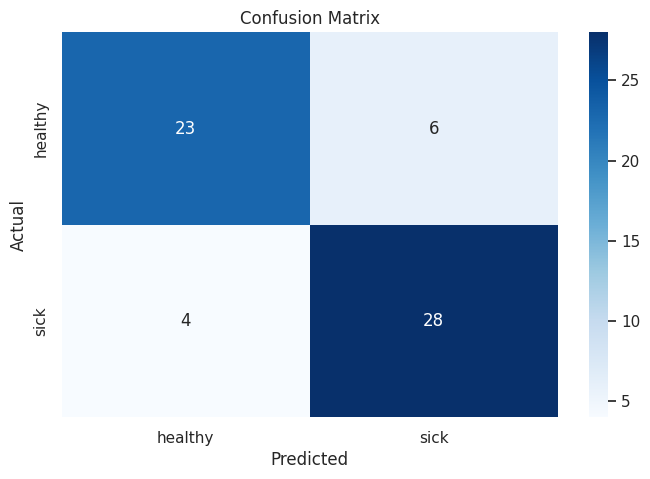

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Define an update function that retrains and evaluates the Logistic Regression model
def update_logistic_model(C, max_iter, solver):
    # Instantiate the Logistic Regression model with the chosen parameters
    model = LogisticRegression(C=C, max_iter=max_iter, solver=solver, random_state=42)
    model.fit(features_train, labels_train)

    # Generate predictions on the test set
    y_pred = model.predict(features_test)

    # Calculate accuracy and display a classification report
    acc = accuracy_score(labels_test, y_pred)
    print(f"Logistic Regression with C={C}, max_iter={max_iter}, solver={solver}")
    print("Accuracy:", round(acc, 3))
    print("\nClassification Report:\n", classification_report(labels_test, y_pred, target_names=['healthy', 'sick']))

    # Plot the confusion matrix
    conf_mat = confusion_matrix(labels_test, y_pred)
    plt.figure(figsize=(8, 5))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
                xticklabels=['healthy', 'sick'], yticklabels=['healthy', 'sick'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Create interactive widgets for parameter tuning
C_slider = widgets.FloatLogSlider(
    value=1.0,
    base=10,
    min=-3,   # 10^-3
    max=3,    # 10^3
    step=0.1,
    description='C:',
    continuous_update=False
)

max_iter_slider = widgets.IntSlider(
    value=100,
    min=50,
    max=1000,
    step=50,
    description='Max Iter:',
    continuous_update=False
)

solver_dropdown = widgets.Dropdown(
    options=['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
    value='lbfgs',
    description='Solver:'
)

# Create the interactive widget interface
interactive_logistic = widgets.interactive(update_logistic_model, C=C_slider, max_iter=max_iter_slider, solver=solver_dropdown)
display(interactive_logistic)
